## 📖 Column Names - Easy Reference Guide

In [46]:
print("=" * 100)
print("📖 COLUMN NAMES - SIMPLE EXPLANATIONS")
print("=" * 100)

column_guide = {
    '✈️ FLIGHT BASICS': {
        'MONTH': 'Month of flight (1-12)',
        'DAY_OF_MONTH': 'Day of month (1-31)',
        'DAY_OF_WEEK': 'Day of week (1=Mon, 7=Sun)',
        'OP_UNIQUE_CARRIER': 'Airline code (AA, DL, UA, etc.)',
        'ORIGIN': 'Departure airport code',
        'DEST': 'Arrival airport (destination) code',
        'DISTANCE': 'Flight distance in miles'
    },
    
    '🕐 TIME COLUMNS': {
        'CRS_DEP_TIME': 'Scheduled departure time',
        'DEP_TIME': 'Actual departure time',
        'CRS_ARR_TIME': 'Scheduled arrival time',
        'ARR_TIME': 'Actual arrival time',
        'WHEELS_OFF': 'Time when plane left ground',
        'WHEELS_ON': 'Time when plane landed',
        'AIR_TIME': 'Minutes in the air',
        'CRS_ELAPSED_TIME': 'Scheduled flight duration',
        'ACTUAL_ELAPSED_TIME': 'Actual flight duration'
    },
    
    '🚕 GROUND OPERATIONS': {
        'TAXI_OUT': 'Minutes taxiing to runway (before takeoff)',
        'TAXI_IN': 'Minutes taxiing from runway (after landing)'
    },
    
    '⏰ DELAYS': {
        'DEP_DELAY': 'Departure delay in minutes',
        'ARR_DELAY': 'Arrival delay in minutes',
        'ARR_DELAY_NEW': 'Arrival delay (negative = early)',
        'ARR_DEL15': 'Was delayed ≥15 min? (0=No, 1=Yes)',
        'DEP_DEL15': 'Departed ≥15 min late? (0=No, 1=Yes)'
    },
    
    '🔍 DELAY CAUSES': {
        'CARRIER_DELAY': 'Delay caused by airline (maintenance, crew, etc.)',
        'WEATHER_DELAY': 'Delay caused by weather',
        'NAS_DELAY': 'Delay caused by air traffic control',
        'SECURITY_DELAY': 'Delay caused by security issues',
        'LATE_AIRCRAFT_DELAY': 'Delay because previous flight was late'
    },
    
    '🚫 DISRUPTIONS': {
        'CANCELLED': 'Flight cancelled? (0=No, 1=Yes)',
        'CANCELLATION_CODE': 'Why cancelled (A=Carrier, B=Weather, C=NAS, D=Security)',
        'DIVERTED': 'Flight diverted to another airport? (0=No, 1=Yes)',
        'DIV_REACHED_DEST': 'Did diverted flight reach destination?'
    }
}

for category, columns in column_guide.items():
    print(f"\n{category}:")
    for col, desc in columns.items():
        print(f"   • {col:25s} → {desc}")

print("\n" + "=" * 100)
print("💡 KEY POINTS:")
print("   • All times are in HHMM format (1835 = 6:35 PM)")
print("   • Delay columns: Positive = late, Negative = early, 0 = on-time")
print("   • ARR_DEL15 is what we PREDICT (delayed ≥15 min or not)")
print("   • Delay causes only exist for delayed flights")
print("=" * 100)

📖 COLUMN NAMES - SIMPLE EXPLANATIONS

✈️ FLIGHT BASICS:
   • MONTH                     → Month of flight (1-12)
   • DAY_OF_MONTH              → Day of month (1-31)
   • DAY_OF_WEEK               → Day of week (1=Mon, 7=Sun)
   • OP_UNIQUE_CARRIER         → Airline code (AA, DL, UA, etc.)
   • ORIGIN                    → Departure airport code
   • DEST                      → Arrival airport (destination) code
   • DISTANCE                  → Flight distance in miles

🕐 TIME COLUMNS:
   • CRS_DEP_TIME              → Scheduled departure time
   • DEP_TIME                  → Actual departure time
   • CRS_ARR_TIME              → Scheduled arrival time
   • ARR_TIME                  → Actual arrival time
   • WHEELS_OFF                → Time when plane left ground
   • WHEELS_ON                 → Time when plane landed
   • AIR_TIME                  → Minutes in the air
   • CRS_ELAPSED_TIME          → Scheduled flight duration
   • ACTUAL_ELAPSED_TIME       → Actual flight duration

🚕 GR

## 🔍 Data Discovery

Let's check what files are available and verify they're being loaded correctly.

In [89]:
# List all CSV files in the data directory
import glob
from pathlib import Path

base_path = Path("/Users/keith/Downloads")
data_path = base_path / "aircraft_data"

csv_files = sorted(glob.glob(str(data_path / "*.csv")))
print(f"Found {len(csv_files)} CSV files:\n")
for f in csv_files:
    filename = Path(f).name
    size_mb = Path(f).stat().st_size / (1024*1024)
    print(f"  {filename:30s} ({size_mb:.1f} MB)")
    
print(f"\nTotal: {len(csv_files)} files")

Found 15 CSV files:

  August_2024.csv                (152.1 MB)
  February_2025.csv              (128.9 MB)
  april_2024.csv                 (138.2 MB)
  april_2025.csv                 (156.1 MB)
  december_2024.csv              (154.5 MB)
  january_2025.csv               (144.2 MB)
  july_2024.csv                  (164.4 MB)
  june_2024.csv                  (158.3 MB)
  june_2025.csv                  (164.1 MB)
  march_2025.csv                 (117.6 MB)
  may_2024.csv                   (150.2 MB)
  may_2025.csv                   (162.1 MB)
  november_2024.csv              (149.6 MB)
  october_2024.csv               (159.3 MB)
  september_2024.csv             (150.1 MB)

Total: 15 files


In [90]:
# Check the raw data in one file to see what months it actually contains
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

# Read just one file to sample
sample_file = str(data_path / "april_2024.csv")
sample_df = spark.read.csv(sample_file, header=True, inferSchema=False)

print(f"Sample from {Path(sample_file).name}:")
sample_df.select("YEAR", "MONTH", "FL_DATE").show(10, truncate=False)

print(f"\nMonth distribution in this file:")
sample_df.groupBy("YEAR", "MONTH").count().orderBy("YEAR", "MONTH").show()

Sample from april_2024.csv:
+----+-----+--------------------+
|YEAR|MONTH|FL_DATE             |
+----+-----+--------------------+
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
|2024|4    |4/1/2024 12:00:00 AM|
+----+-----+--------------------+
only showing top 10 rows

Month distribution in this file:
+----+-----+------+
|YEAR|MONTH| count|
+----+-----+------+
|2024|    4|582205|
+----+-----+------+



In [5]:
# Set up local data paths
import os
from pathlib import Path

# Use your actual data locations
base_path = Path("/Users/keith/Downloads")
data_path = base_path / "aircraft_data"
output_path = base_path / "aircraft_data_output"
carrier_codes_path = base_path

# Create output directory if it doesn't exist
output_path.mkdir(parents=True, exist_ok=True)

print(f"Data directory: {data_path}")
print(f"Output directory: {output_path}")
print(f"Carrier codes path: {carrier_codes_path}")

Data directory: /Users/keith/Downloads/aircraft_data
Output directory: /Users/keith/Downloads/aircraft_data_output
Carrier codes path: /Users/keith/Downloads


In [4]:
# Check if data files exist
csv_files = list(data_path.glob("*.csv"))
if csv_files:
    print(f"Found {len(csv_files)} CSV files:")
    for f in csv_files[:5]:  # Show first 5
        print(f"  - {f.name}")
    if len(csv_files) > 5:
        print(f"  ... and {len(csv_files) - 5} more")
else:
    print(f"⚠️ No CSV files found in {data_path}")
    print(f"Please place your aircraft CSV data files in this directory.")

Found 15 CSV files:
  - February_2025.csv
  - december_2024.csv
  - september_2024.csv
  - november_2024.csv
  - july_2024.csv
  ... and 10 more


In [2]:
# Set Java 21 as the JAVA_HOME for this session
import os
import subprocess

# Try Java 21, 17, or 11 in that order
for version in ['21', '17', '11']:
    try:
        java_home = subprocess.check_output(['/usr/libexec/java_home', '-v', version], text=True).strip()
        os.environ['JAVA_HOME'] = java_home
        print(f"✓ Using Java {version}: {java_home}")
        break
    except:
        continue
else:
    print("⚠️ No compatible Java version (11, 17, or 21) found. PySpark may not work with Java 25+")

# Set environment variables before importing PySpark
os.environ['PYSPARK_SUBMIT_ARGS'] = '--conf spark.driver.extraJavaOptions="--add-exports=java.base/sun.security.action=ALL-UNNAMED" pyspark-shell'

from pyspark.sql import SparkSession

✓ Using Java 21: /Library/Java/JavaVirtualMachines/temurin-21.jdk/Contents/Home


In [3]:
spark = SparkSession.builder \
    .appName("MergeCSV") \
    .config("spark.driver.memory", "8g") \
    .config("spark.driver.maxResultSize", "4g") \
    .config("spark.driver.extraJavaOptions", "--add-exports=java.base/sun.security.action=ALL-UNNAMED") \
    .config("spark.executor.extraJavaOptions", "--add-exports=java.base/sun.security.action=ALL-UNNAMED") \
    .getOrCreate()

print(f"✓ Spark {spark.version} session created successfully!")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/12/04 18:31:11 WARN Utils: Your hostname, MacBook-Air.local, resolves to a loopback address: 127.0.0.1; using 10.251.100.228 instead (on interface en0)
25/12/04 18:31:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/12/04 18:31:11 WARN Utils: Your hostname, MacBook-Air.local, resolves to a loopback address: 127.0.0.1; using 10.251.100.228 instead (on interface en0)
25/12/04 18:31:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level

✓ Spark 4.0.1 session created successfully!


In [125]:
import glob
from pyspark.sql import DataFrame
from functools import reduce

# Get all CSV files from local directory
all_files = glob.glob(str(data_path / "*.csv"))

if not all_files:
    raise FileNotFoundError(f"No CSV files found in {data_path}. Please add your data files.")

print(f"Loading {len(all_files)} CSV files...")

df_list = []
for f in all_files:
    print(f"  Loading: {Path(f).name}")
    # Don't infer schema - read as strings to avoid cast errors
    df = spark.read.csv(f, header=True, inferSchema=False)
    # Drop FL_DATE immediately to avoid parsing issues
    df = df.drop("FL_DATE")
    df_list.append(df)

# Use unionByName with allowMissingColumns to handle schema differences
merged_df = df_list[0]
for df in df_list[1:]:
    merged_df = merged_df.unionByName(df, allowMissingColumns=True)

print(f"\n✓ Successfully loaded {merged_df.count():,} rows")

# Check months IMMEDIATELY after loading
print("\nMonths in data RIGHT after loading (before any filtering):")
merged_df.groupBy("YEAR", "MONTH").count().orderBy("YEAR", "MONTH").show(20)

merged_df.printSchema()

Loading 15 CSV files...
  Loading: February_2025.csv
  Loading: december_2024.csv
  Loading: september_2024.csv
  Loading: november_2024.csv
  Loading: july_2024.csv
  Loading: june_2024.csv
  Loading: september_2024.csv
  Loading: november_2024.csv
  Loading: july_2024.csv
  Loading: june_2024.csv
  Loading: june_2025.csv
  Loading: october_2024.csv
  Loading: april_2024.csv
  Loading: january_2025.csv
  Loading: april_2025.csv
  Loading: june_2025.csv
  Loading: october_2024.csv
  Loading: april_2024.csv
  Loading: january_2025.csv
  Loading: april_2025.csv
  Loading: march_2025.csv
  Loading: may_2024.csv
  Loading: may_2025.csv
  Loading: August_2024.csv
  Loading: march_2025.csv
  Loading: may_2024.csv
  Loading: may_2025.csv
  Loading: August_2024.csv



✓ Successfully loaded 9,554,722 rows

Months in data RIGHT after loading (before any filtering):


+----+-----+------+
|YEAR|MONTH| count|
+----+-----+------+
|2024|   10|656283|
|2024|   11|614597|
|2024|   12|631944|
|2024|    4|582205|
|2024|    5|649428|
|2024|    6|651799|
|2024|    7|676807|
|2024|    8|660639|
|2024|    9|621649|
|2025|    1|599013|
|2025|    2|559577|
|2025|    3|664932|
|2025|    4|644084|
|2025|    5|667586|
|2025|    6|674179|
+----+-----+------+

root
 |-- YEAR: string (nullable = true)
 |-- MONTH: string (nullable = true)
 |-- DAY_OF_MONTH: string (nullable = true)
 |-- DAY_OF_WEEK: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_CITY_NAME: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: string (nullable = true)
 |-- DEP_TIME: string (nullable = true)
 |-- DEP_DELAY: string (nullable = true)
 |-- DEP_DELAY_NEW

In [38]:
from pyspark.sql import functions as F

# Date parsing is now handled later in the pipeline

In [126]:
int_cols = [
    "YEAR","MONTH","DAY_OF_MONTH","DAY_OF_WEEK",
    "CRS_DEP_TIME","DEP_TIME","CRS_ARR_TIME","ARR_TIME",
    "DEP_DEL15","ARR_DEL15","CANCELLED","DIVERTED","DUP",
    "DISTANCE_GROUP","DIV_AIRPORT_LANDINGS","DIV_REACHED_DEST"
]

float_cols = [
    "DEP_DELAY","DEP_DELAY_NEW","ARR_DELAY","ARR_DELAY_NEW",
    "TAXI_OUT","TAXI_IN","AIR_TIME",
    "ARR_DELAY_GROUP","DEP_DELAY_GROUP",
    "CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY",
    "SECURITY_DELAY","LATE_AIRCRAFT_DELAY",
    "DISTANCE","FLIGHTS","ACTUAL_ELAPSED_TIME","CRS_ELAPSED_TIME"
]

from pyspark.sql import types as T

# Use try_cast to handle invalid values
for c in int_cols:
    merged_df = merged_df.withColumn(c, F.expr(f"try_cast({c} as int)"))
for c in float_cols:
    merged_df = merged_df.withColumn(c, F.expr(f"try_cast({c} as double)"))

print("After type conversions:")
merged_df.groupBy("YEAR", "MONTH").count().orderBy("YEAR", "MONTH").show(20)

After type conversions:


+----+-----+------+
|YEAR|MONTH| count|
+----+-----+------+
|2024|    4|582205|
|2024|    5|649428|
|2024|    6|651799|
|2024|    7|676807|
|2024|    8|660639|
|2024|    9|621649|
|2024|   10|656283|
|2024|   11|614597|
|2024|   12|631944|
|2025|    1|599013|
|2025|    2|559577|
|2025|    3|664932|
|2025|    4|644084|
|2025|    5|667586|
|2025|    6|674179|
+----+-----+------+



In [127]:
# Drop FL_DATE to avoid parsing issues
merged_df = merged_df.drop("FL_DATE")

print("BEFORE dropna:")
merged_df.groupBy("YEAR", "MONTH").count().orderBy("YEAR", "MONTH").show(20)

# Check null counts for the columns we're about to filter
print("\nNull counts in critical columns:")
from pyspark.sql import functions as F
merged_df.select(
    [F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in ["ORIGIN","DEST","ARR_DELAY","DEP_DELAY"]]
).show()

# Drop rows where critical columns are null
merged_df = merged_df.dropna(subset=["ORIGIN","DEST","ARR_DELAY","DEP_DELAY"])

print("\nAFTER dropna:")
merged_df.groupBy("YEAR", "MONTH").count().orderBy("YEAR", "MONTH").show(20)

BEFORE dropna:


+----+-----+------+
|YEAR|MONTH| count|
+----+-----+------+
|2024|    4|582205|
|2024|    5|649428|
|2024|    6|651799|
|2024|    7|676807|
|2024|    8|660639|
|2024|    9|621649|
|2024|   10|656283|
|2024|   11|614597|
|2024|   12|631944|
|2025|    1|599013|
|2025|    2|559577|
|2025|    3|664932|
|2025|    4|644084|
|2025|    5|667586|
|2025|    6|674179|
+----+-----+------+


Null counts in critical columns:


+------+----+---------+---------+
|ORIGIN|DEST|ARR_DELAY|DEP_DELAY|
+------+----+---------+---------+
|     0|   0|   156563|   126421|
+------+----+---------+---------+


AFTER dropna:


+----+-----+------+
|YEAR|MONTH| count|
+----+-----+------+
|2024|    4|576935|
|2024|    5|637694|
|2024|    6|641379|
|2024|    7|654801|
|2024|    8|645031|
|2024|    9|617040|
|2024|   10|649222|
|2024|   11|610885|
|2024|   12|625613|
|2025|    1|578957|
|2025|    2|549887|
|2025|    3|655553|
|2025|    4|637350|
|2025|    5|658139|
|2025|    6|659673|
+----+-----+------+



In [128]:
delay_cols = ["ARR_DELAY_NEW","DEP_DELAY_NEW",
              "CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY",
              "SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]

merged_df = merged_df.na.fill(0, subset=delay_cols)

In [129]:
merged_df = merged_df.withColumn(
    "DEP_DELAY_MIN",
    F.when(F.col("DEP_DELAY_NEW").isNotNull(), F.col("DEP_DELAY_NEW"))
     .otherwise(F.col("DEP_DELAY"))
)

merged_df = merged_df.withColumn(
    "ARR_DELAY_MIN",
    F.when(F.col("ARR_DELAY_NEW").isNotNull(), F.col("ARR_DELAY_NEW"))
     .otherwise(F.col("ARR_DELAY"))
)

In [131]:
from pyspark.sql import functions as F

# Filter out cancelled and diverted flights
# Treat NULL as 0 (not cancelled/diverted)
merged_df = merged_df.filter(
    (F.coalesce(F.col("CANCELLED"), F.lit(0)) == 0) & 
    (F.coalesce(F.col("DIVERTED"), F.lit(0)) == 0)
)

print("After filtering cancelled/diverted:")
merged_df.groupBy("YEAR", "MONTH").count().orderBy("YEAR", "MONTH").show(20)

After filtering cancelled/diverted:


+----+-----+------+
|YEAR|MONTH| count|
+----+-----+------+
|2024|    4|576935|
|2024|    5|637694|
|2024|    6|641379|
|2024|    7|654801|
|2024|    8|645031|
|2024|    9|617040|
|2024|   10|649222|
|2024|   11|610885|
|2024|   12|625613|
|2025|    1|578957|
|2025|    2|549887|
|2025|    3|655553|
|2025|    4|637350|
|2025|    5|658139|
|2025|    6|659673|
+----+-----+------+



In [132]:
# Compute 99th percentile using percentile_approx (much faster)
q = merged_df.agg(
    F.expr("percentile_approx(DEP_DELAY_NEW, 0.99, 10000)").alias("p99_dep"),
    F.expr("percentile_approx(ARR_DELAY_NEW, 0.99, 10000)").alias("p99_arr")
).collect()[0]

p99_dep = float(q["p99_dep"])
p99_arr = float(q["p99_arr"])

print(f"99th percentile for Departure Delay: {p99_dep}")
print(f"99th percentile for Arrival Delay: {p99_arr}")

# Clip delay columns
merged_df = (
    merged_df
    .withColumn(
        "DEP_DELAY_CLIPPED",
        F.when(F.col("DEP_DELAY_NEW") > p99_dep, p99_dep)
         .otherwise(F.col("DEP_DELAY_NEW"))
    )
    .withColumn(
        "ARR_DELAY_CLIPPED",
        F.when(F.col("ARR_DELAY_NEW") > p99_arr, p99_arr)
         .otherwise(F.col("ARR_DELAY_NEW"))
    )
)


99th percentile for Departure Delay: 219.0
99th percentile for Arrival Delay: 220.0


In [56]:
merged_df.select(
    F.max("DEP_DELAY_MIN").alias("max_dep_raw"),
    F.max("ARR_DELAY_MIN").alias("max_arr_raw"),
    F.max("DEP_DELAY_CLIPPED").alias("max_dep_clipped"),
    F.max("ARR_DELAY_CLIPPED").alias("max_arr_clipped"),
).show()

+-----------+-----------+---------------+---------------+
|max_dep_raw|max_arr_raw|max_dep_clipped|max_arr_clipped|
+-----------+-----------+---------------+---------------+
|     5923.0|     5907.0|          213.0|          215.0|
+-----------+-----------+---------------+---------------+



In [57]:
merged_df.select(
    F.mean("DEP_DELAY_NEW").alias("mean_dep"),
    F.stddev("DEP_DELAY_NEW").alias("std_dep"),
    F.min("DEP_DELAY_NEW").alias("min_dep"),
    F.expr("percentile_approx(DEP_DELAY_NEW, 0.25)").alias("q1_dep"),
    F.expr("percentile_approx(DEP_DELAY_NEW, 0.5)").alias("median_dep"),
    F.expr("percentile_approx(DEP_DELAY_NEW, 0.75)").alias("q3_dep"),
    F.max("DEP_DELAY_NEW").alias("max_dep")
).show()


+------------------+------------------+-------+------+----------+------+-------+
|          mean_dep|           std_dep|min_dep|q1_dep|median_dep|q3_dep|max_dep|
+------------------+------------------+-------+------+----------+------+-------+
|14.912069657220698|53.323151389687546|    0.0|   0.0|       0.0|   6.0| 5923.0|
+------------------+------------------+-------+------+----------+------+-------+



In [58]:
stats = merged_df.agg(
    F.expr("percentile_approx(DEP_DELAY_NEW, 0.25)").alias("q1"),
    F.expr("percentile_approx(DEP_DELAY_NEW, 0.75)").alias("q3")
).collect()[0]

q1, q3 = stats["q1"], stats["q3"]
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

print(f"IQR: {iqr:.2f}, Upper limit for outliers: {upper_limit:.2f}")

# Count how many outliers
outliers = merged_df.filter(F.col("DEP_DELAY_NEW") > upper_limit).count()
total = merged_df.count()
print(f"Outlier count: {outliers}, ({outliers/total*100:.2f}%)")


IQR: 6.00, Upper limit for outliers: 15.00


Outlier count: 120041, (18.31%)


In [59]:
print("Row count:", merged_df.count())
print("Columns:", len(merged_df.columns))
merged_df.printSchema()

Row count: 655553
Columns: 52
root
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DEST_CITY_NAME: string (nullable = true)
 |-- DEST_STATE_ABR: string (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: integer (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = false)
 |-- DEP_DEL15: integer (nullable = true)
 |-- DEP_DELAY_GROUP: double (nullable = true)
 |-- DEP_TIME_BLK: string (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: string (nullable = true)
 |-- WHEELS_ON: string (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: int

### Data Cleaning Summary

- **Initial rows:** 8,972,517  
- **Final rows:** 8,165,671 (≈9% reduction due to removing cancelled/diverted/null delay flights)
- **Columns added:** `DEP_DELAY_MIN`, `ARR_DELAY_MIN`, `DEP_DELAY_CLIPPED`, `ARR_DELAY_CLIPPED`
- **Key conversions:**
  - `FL_DATE` → converted from string → date
  - `CANCELLED`, `DIVERTED`, `DUP` → converted to integer (0/1)
  - Delay columns (`_NEW`) made non-nullable
- **Outlier handling:**  
  - Using the IQR method, delays above 22.5 min were frequent (~17%), showing a right-skewed distribution.  
  - Therefore, delays were capped at the 99th percentile (≈222 min) to smooth extreme values without losing legitimate delay patterns.
- **Result:** Clean, numeric, and analysis-ready dataset (`merged_df`) with consistent schema and reliable delay metrics.


In [133]:
# Save to parquet in local output directory
parquet_file = output_path / "aircraft_info.parquet"
print(f"Saving to: {parquet_file}")

merged_df.write.mode("overwrite").parquet(str(parquet_file))
print("✓ Saved successfully!")

Saving to: /Users/keith/Downloads/aircraft_data_output/aircraft_info.parquet


25/12/04 18:12:02 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/12/04 18:12:07 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/12/04 18:12:07 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/12/04 18:12:08 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/12/04 18:12:08 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/12/04 18:12:09 WARN MemoryManager: Total allocation exceeds 95.00% (1,020,054,720 bytes) of heap memory
Scaling row group sizes to 95.00% for 8 writers
25/12/04 18:12:09 WARN MemoryManager: Total allocation exceeds 95.00% 

✓ Saved successfully!


In [6]:
# Read from local parquet file
parquet_file = output_path / "aircraft_info.parquet"
parquet_df = spark.read.parquet(str(parquet_file))

print(f"Parquet rows: {parquet_df.count():,}")
parquet_df.show(5)

Parquet rows: 9,398,159


25/12/04 18:31:28 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+-----+------------+-----------+-----------------+------+----------------+----------------+----+--------------------+--------------+------------+--------+---------+-------------+---------+---------------+------------+--------+----------+---------+-------+------------+--------+---------+-------------+---------+---------------+------------+---------+-----------------+--------+----+----------------+-------------------+--------+-------+--------+--------------+-------------+-------------+---------+--------------+-------------------+--------------------+----------------+---------------+-------------+-------------+-------------+-----------------+-----------------+
|YEAR|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|ORIGIN_CITY_NAME|ORIGIN_STATE_ABR|DEST|      DEST_CITY_NAME|DEST_STATE_ABR|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|DEP_DELAY_NEW|DEP_DEL15|DEP_DELAY_GROUP|DEP_TIME_BLK|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|ARR_DELAY_NEW|ARR_DEL15|ARR_DELAY_GRO

In [62]:
print(f"Rows: {parquet_df.count()}")
print(f"Columns: {len(parquet_df.columns)}")

Rows: 655553
Columns: 52


**EDA**


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pyspark.sql.functions as F

# Sample down for plotting (Spark -> Pandas)
pdf = parquet_df.sample(False, 0.01, seed=42).toPandas()


In [136]:
# Load airline carrier codes from local directory
codes_file = carrier_codes_path / "airline_carrier_code.csv"

if not codes_file.exists():
    print(f"⚠️ Carrier code file not found: {codes_file}")
    print("Please place 'airline_carrier_code.csv' in this directory.")
    print("Continuing without airline name mapping...")
    codes_sdf_raw = None
else:
    codes_sdf_raw = (spark.read
                     .option("header", True)
                     .option("inferSchema", True)
                     .option("multiLine", True)
                     .option("escape", "\"")
                     .csv(str(codes_file)))
    codes_sdf_raw.show(5)

+----+--------------------+
|Code|         Description|
+----+--------------------+
| 02Q|       Titan Airways|
| 05Q| Comlux Aviation, AG|
| 06Q|Master Top Linhas...|
| 07Q| Flair Airlines Ltd.|
| 09Q|Swift Air, LLC d/...|
+----+--------------------+
only showing top 5 rows


In [137]:
# Process carrier codes (skip if file not found)
if codes_sdf_raw is not None:
    # Rename to standard column names
    codes_sdf = (codes_sdf_raw
                 .withColumnRenamed("Code", "OP_UNIQUE_CARRIER")
                 .withColumnRenamed("Description", "airline_name"))

    # Normalize: strip " (1)", " (2)" suffixes, trim, uppercase
    codes_sdf = (codes_sdf
                 .withColumn("OP_UNIQUE_CARRIER", F.upper(F.trim(
                     F.regexp_replace(F.col("OP_UNIQUE_CARRIER"), r"\s*\(\d+\)\s*$", "")
                 )))
                 .withColumn("airline_name", F.trim(F.col("airline_name"))))

    # Some files contain duplicates (historical variants). Keep first occurrence per code.
    from pyspark.sql.window import Window
    w = Window.partitionBy("OP_UNIQUE_CARRIER").orderBy(F.lit(1))
    codes_sdf = (codes_sdf
                 .withColumn("rn", F.row_number().over(w))
                 .filter(F.col("rn") == 1)
                 .drop("rn"))

    codes_sdf.cache().count()  # materialize
    codes_sdf.show(10, truncate=False)
else:
    codes_sdf = None
    print("Skipping carrier code processing...")

25/12/04 18:15:50 WARN CacheManager: Asked to cache already cached data.


+-----------------+----------------------------+
|OP_UNIQUE_CARRIER|airline_name                |
+-----------------+----------------------------+
|CLQ              |Aero Transcolombiana        |
|KKQ              |Transmeridian Air Cargo Ltd.|
|LT               |Luftransport-Unternehmen    |
|MM               |Euro Atlantic Airways       |
|PEA              |Pearson Aircraft            |
|SKJ              |Sky-Jet                     |
|WNG              |Wings Airways               |
|XBV              |Nal Inc.                    |
|0YQ              |Comlux Malta Ltd.           |
|AAT              |Air Sunshine Inc.           |
+-----------------+----------------------------+
only showing top 10 rows


In [138]:
# Join with airline names (if available)
if codes_sdf is not None:
    # Left join to add airline_name; fallback to code if no match
    parquet_df = (parquet_df
                  .withColumn("OP_UNIQUE_CARRIER", F.upper(F.col("OP_UNIQUE_CARRIER")))
                  .join(codes_sdf, on="OP_UNIQUE_CARRIER", how="left")
                  .withColumn("airline_name", F.coalesce(F.col("airline_name"),
                                                         F.col("OP_UNIQUE_CARRIER"))))

    # Sanity check
    parquet_df.select("OP_UNIQUE_CARRIER","airline_name").distinct().orderBy("OP_UNIQUE_CARRIER").show(20, truncate=False)
else:
    # Use carrier code as airline name
    parquet_df = parquet_df.withColumn("airline_name", F.col("OP_UNIQUE_CARRIER"))
    print("Using carrier codes as airline names...")

+-----------------+---------------------------------------+
|OP_UNIQUE_CARRIER|airline_name                           |
+-----------------+---------------------------------------+
|NULL             |NULL                                   |
|9E               |Endeavor Air Inc.                      |
|AA               |American Airlines Inc.                 |
|AS               |Alaska Airlines Inc.                   |
|B6               |JetBlue Airways                        |
|C5               |CommuteAir LLC dba CommuteAir          |
|DL               |Delta Air Lines Inc.                   |
|F9               |Frontier Airlines Inc.                 |
|G4               |Allegiant Air                          |
|G7               |GoJet Airlines LLC d/b/a United Express|
|HA               |Hawaiian Airlines Inc.                 |
|MQ               |Envoy Air                              |
|NK               |Spirit Air Lines                       |
|OH               |PSA Airlines Inc.    

/var/folders/2s/fm5ygl2x7_d72hpcs5smk56h0000gn/T/ipykernel_65180/752310245.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x="airline_name", y="avg_arr_delay", palette="coolwarm")


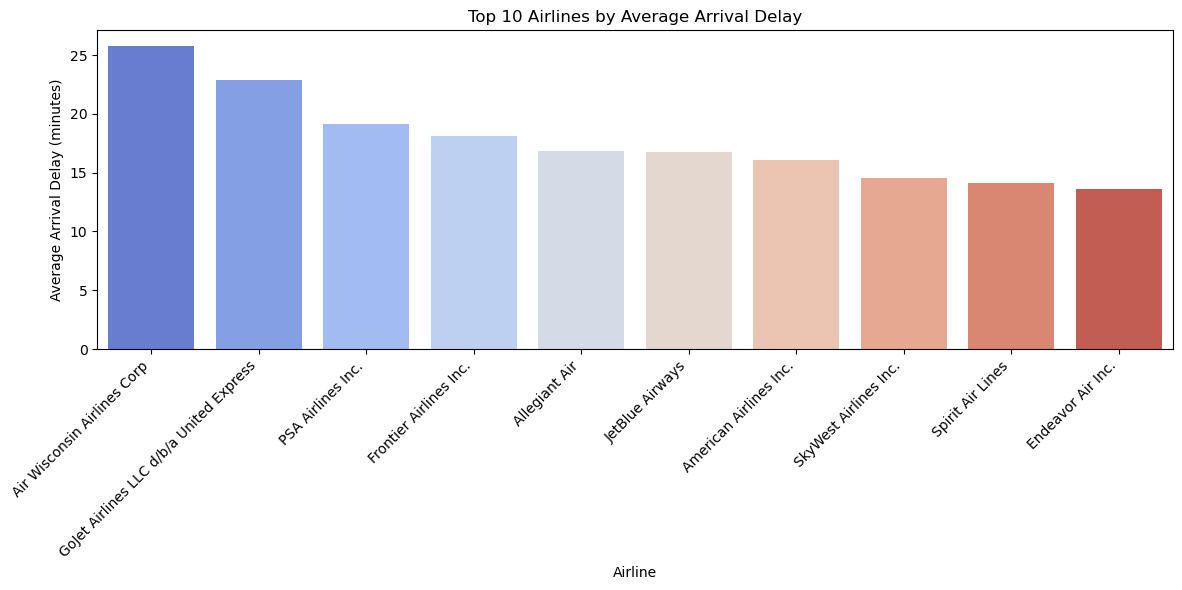

In [67]:
avg_delay_by_carrier = (
    parquet_df.groupBy("airline_name")
    .agg(
        F.mean("DEP_DELAY_CLIPPED").alias("avg_dep_delay"),
        F.mean("ARR_DELAY_CLIPPED").alias("avg_arr_delay")
    )
    .orderBy(F.desc("avg_arr_delay"))
)

# Convert to Pandas
pdf_carrier = avg_delay_by_carrier.toPandas()

# Take top 10 only
top10 = pdf_carrier.head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x="airline_name", y="avg_arr_delay", palette="coolwarm")

plt.title("Top 10 Airlines by Average Arrival Delay")
plt.xlabel("Airline")
plt.ylabel("Average Arrival Delay (minutes)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


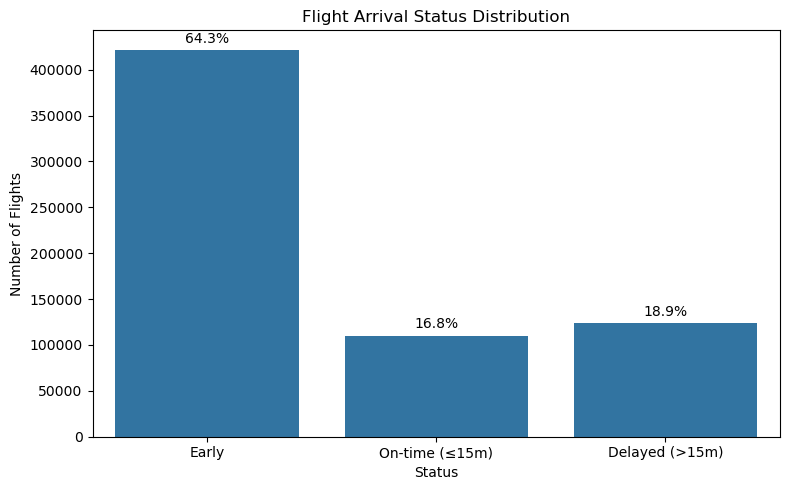

In [68]:
import pyspark.sql.functions as F
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Build status labels from ARR_DELAY (use ARR_DELAY, not the clipped version, to capture early arrivals)
status_df = (parquet_df
    .select("ARR_DELAY")                               # assumes you've already filtered cancelled/diverted rows
    .na.drop(subset=["ARR_DELAY"])
    .withColumn(
        "status",
        F.when(F.col("ARR_DELAY") < 0, "Early")
         .when(F.col("ARR_DELAY") <= 15, "On-time (≤15m)")
         .otherwise("Delayed (>15m)")
    )
)

# 2) Count per status
counts_df = status_df.groupBy("status").count()

# 3) To pandas + add percentages + ordering
pdf = counts_df.toPandas()
order = ["Early", "On-time (≤15m)", "Delayed (>15m)"]
pdf["status"] = pd.Categorical(pdf["status"], categories=order, ordered=True)
pdf = pdf.sort_values("status")
pdf["pct"] = (pdf["count"] / pdf["count"].sum() * 100).round(1)

# 4) Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(data=pdf, x="status", y="count")
plt.title("Flight Arrival Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Flights")
plt.tight_layout()

# 5) Annotate bars with percentages
for p, pct in zip(ax.patches, pdf["pct"]):
    height = p.get_height()
    ax.annotate(f"{pct}%", (p.get_x()+p.get_width()/2, height),
                ha="center", va="bottom", xytext=(0, 3), textcoords="offset points")

plt.show()


/var/folders/2s/fm5ygl2x7_d72hpcs5smk56h0000gn/T/ipykernel_65180/2747290115.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_by_flights, x="OP_UNIQUE_CARRIER", y="avg_arr",
/var/folders/2s/fm5ygl2x7_d72hpcs5smk56h0000gn/T/ipykernel_65180/2747290115.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_by_delay, x="OP_UNIQUE_CARRIER", y="avg_arr",


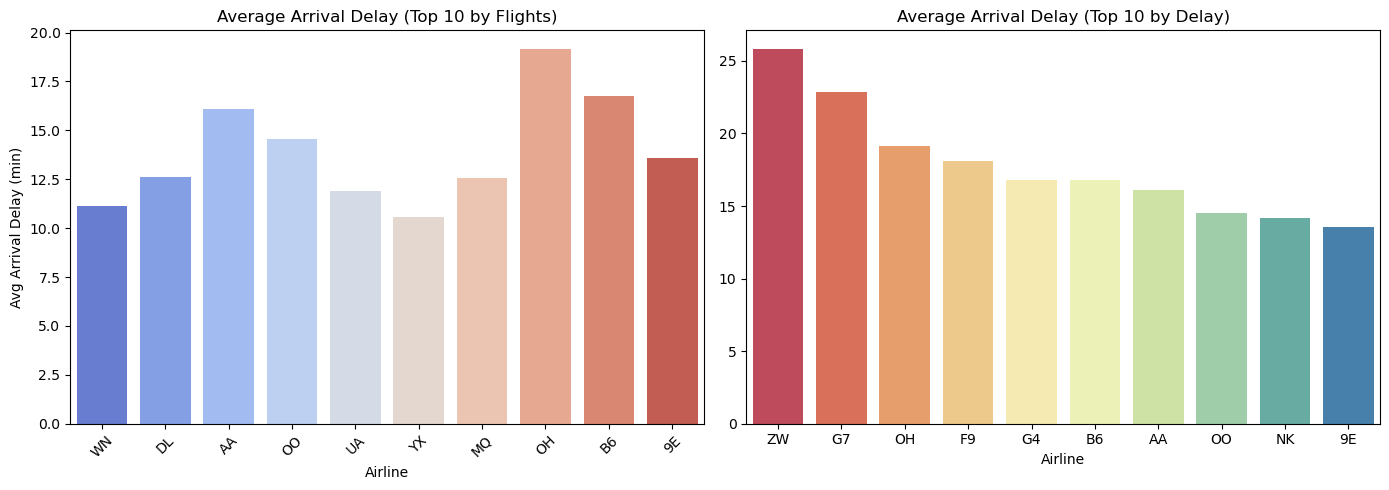

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.sql.functions as F

# --- Prepare both DataFrames ---
by_carrier = (
    parquet_df.groupBy("OP_UNIQUE_CARRIER")
    .agg(
        F.count("*").alias("flight_count"),
        F.mean("ARR_DELAY_CLIPPED").alias("avg_arr")
    )
    .toPandas()
)

# Sort two ways
top10_by_flights = by_carrier.sort_values("flight_count", ascending=False).head(10)
top10_by_delay   = by_carrier.sort_values("avg_arr", ascending=False).head(10)

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(data=top10_by_flights, x="OP_UNIQUE_CARRIER", y="avg_arr",
            palette="coolwarm", ax=axes[0])
axes[0].set_title("Average Arrival Delay (Top 10 by Flights)")
axes[0].set_xlabel("Airline")
axes[0].set_ylabel("Avg Arrival Delay (min)")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=top10_by_delay, x="OP_UNIQUE_CARRIER", y="avg_arr",
            palette="Spectral", ax=axes[1])
axes[1].set_title("Average Arrival Delay (Top 10 by Delay)")
axes[1].set_xlabel("Airline")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


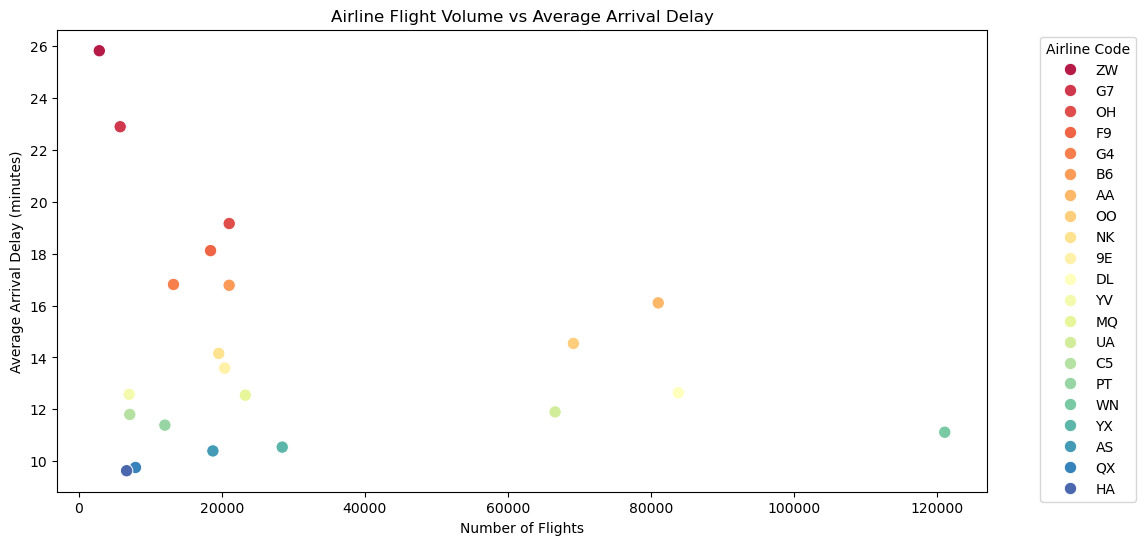

In [70]:
avg_delay_by_carrier = (
    parquet_df.groupBy("OP_UNIQUE_CARRIER")
      .agg(
          F.count("*").alias("flight_count"),
          F.mean("ARR_DELAY_CLIPPED").alias("avg_arr_delay")
      )
      .orderBy(F.desc("avg_arr_delay"))
)

pdf = avg_delay_by_carrier.toPandas()

plt.figure(figsize=(12,6))
sns.scatterplot(data=pdf, x="flight_count", y="avg_arr_delay",
                hue="OP_UNIQUE_CARRIER", palette="Spectral", s=80)
plt.title("Airline Flight Volume vs Average Arrival Delay")
plt.xlabel("Number of Flights")
plt.ylabel("Average Arrival Delay (minutes)")
plt.legend(title="Airline Code", bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


/var/folders/2s/fm5ygl2x7_d72hpcs5smk56h0000gn/T/ipykernel_65180/3524324423.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf_dow, x="DAY_OF_WEEK", y="avg_arr_delay", palette="viridis")


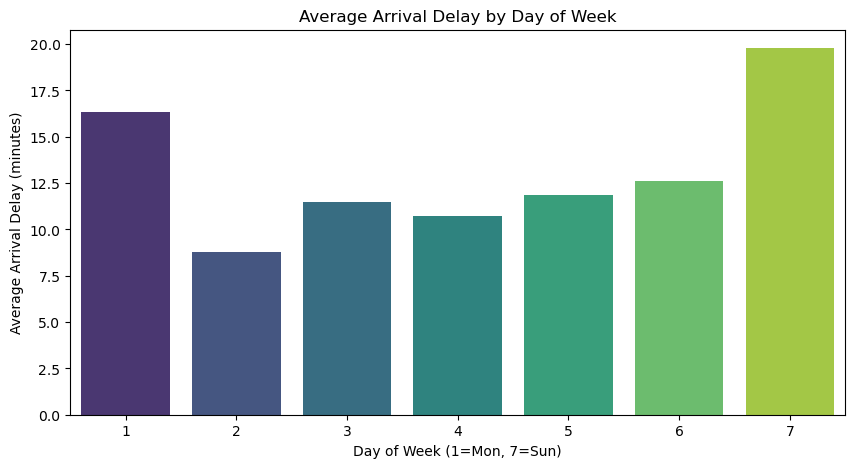

In [71]:
avg_delay_by_dow = (
    parquet_df.groupBy("DAY_OF_WEEK")
    .agg(F.mean("ARR_DELAY_CLIPPED").alias("avg_arr_delay"))
    .orderBy("DAY_OF_WEEK")
)
pdf_dow = avg_delay_by_dow.toPandas()

plt.figure(figsize=(10,5))
sns.barplot(data=pdf_dow, x="DAY_OF_WEEK", y="avg_arr_delay", palette="viridis")
plt.title("Average Arrival Delay by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()


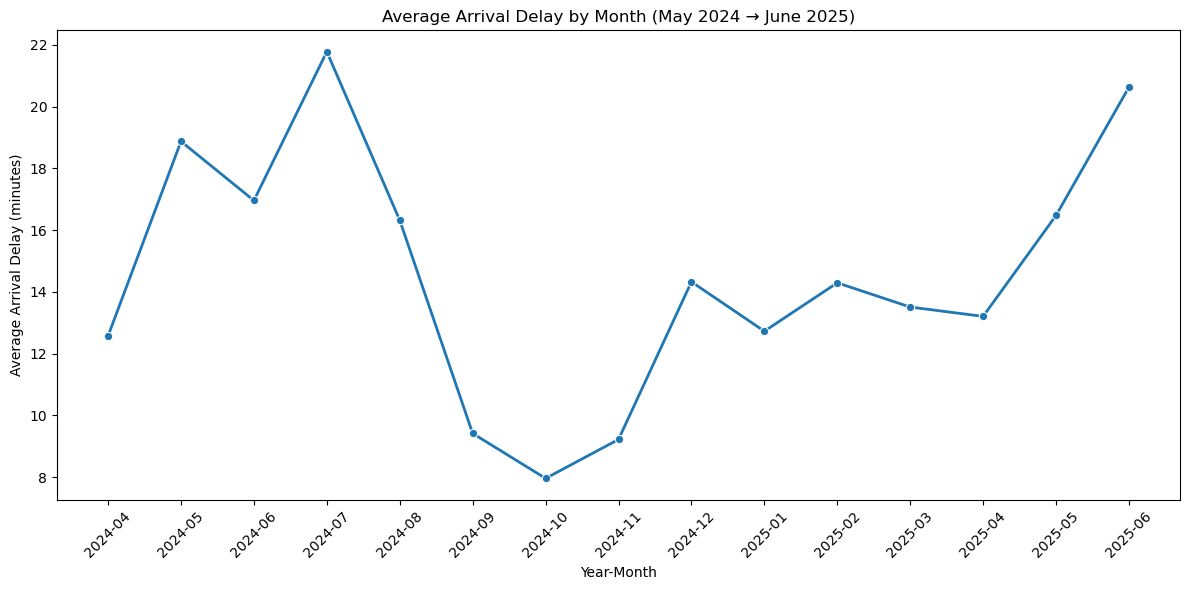

In [139]:
# Combine YEAR and MONTH into a single 'period' column for continuous timeline
monthly_delay = (
    parquet_df.groupBy("YEAR", "MONTH")
    .agg(F.mean("ARR_DELAY_CLIPPED").alias("avg_arr_delay"))
    .orderBy("YEAR", "MONTH")
)

pdf_monthly = monthly_delay.toPandas()
pdf_monthly["period"] = (
    pdf_monthly["YEAR"].astype(str) + "-" + pdf_monthly["MONTH"].astype(str).str.zfill(2)
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(data=pdf_monthly, x="period", y="avg_arr_delay", marker="o", linewidth=2)
plt.xticks(rotation=45)
plt.title("Average Arrival Delay by Month (May 2024 → June 2025)")
plt.xlabel("Year-Month")
plt.ylabel("Average Arrival Delay (minutes)")
plt.tight_layout()
plt.show()


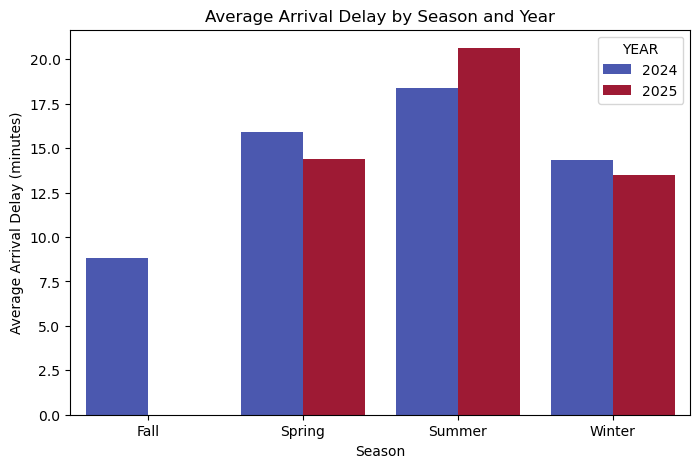

In [140]:
season_expr = (
    F.when(F.col("MONTH").isin(12, 1, 2), "Winter")
     .when(F.col("MONTH").isin(3, 4, 5), "Spring")
     .when(F.col("MONTH").isin(6, 7, 8), "Summer")
     .when(F.col("MONTH").isin(9, 10, 11), "Fall")
)

seasonal_delay = (
    parquet_df.withColumn("SEASON", season_expr)
    .groupBy("YEAR", "SEASON")
    .agg(F.mean("ARR_DELAY_CLIPPED").alias("avg_arr_delay"))
    .orderBy("YEAR", "SEASON")
)

pdf_season = seasonal_delay.toPandas()

plt.figure(figsize=(8,5))
sns.barplot(data=pdf_season, x="SEASON", y="avg_arr_delay", hue="YEAR", palette="coolwarm")
plt.title("Average Arrival Delay by Season and Year")
plt.xlabel("Season")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()


Correlation between departure and arrival delays: 0.959


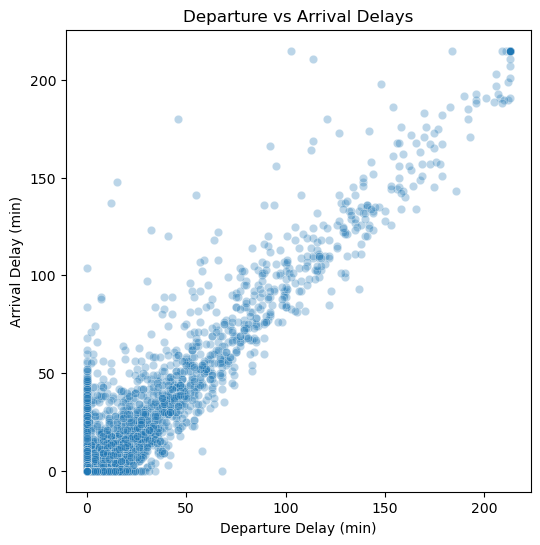

In [75]:
corr_val = parquet_df.stat.corr("DEP_DELAY_CLIPPED", "ARR_DELAY_CLIPPED")
print(f"Correlation between departure and arrival delays: {corr_val:.3f}")

# Sample data for plotting
pdf_sample = parquet_df.select("DEP_DELAY_CLIPPED", "ARR_DELAY_CLIPPED").sample(False, 0.01, seed=42).toPandas()

plt.figure(figsize=(6,6))
sns.scatterplot(data=pdf_sample, x="DEP_DELAY_CLIPPED", y="ARR_DELAY_CLIPPED", alpha=0.3)
plt.title(f"Departure vs Arrival Delays")
plt.xlabel("Departure Delay (min)")
plt.ylabel("Arrival Delay (min)")
plt.show()

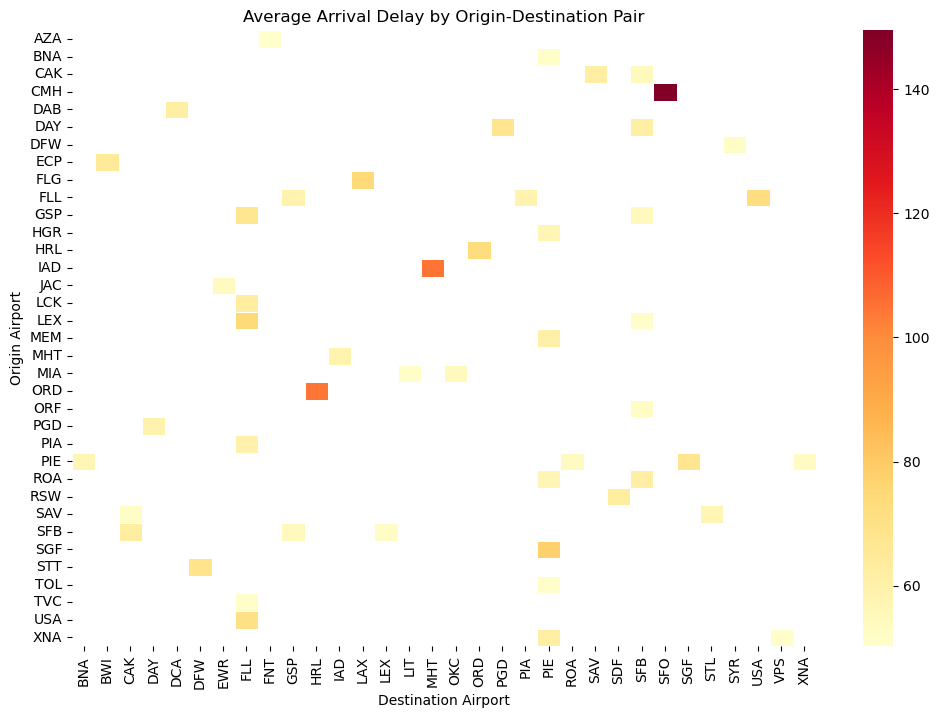

In [76]:
delay_heatmap = (
    parquet_df.groupBy("ORIGIN", "DEST")
    .agg(F.mean("ARR_DELAY_CLIPPED").alias("avg_delay"))
    .orderBy("avg_delay", ascending=False)
    .limit(50)  # limit for visualization
)

pdf_heat = delay_heatmap.toPandas().pivot(index="ORIGIN", columns="DEST", values="avg_delay")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(pdf_heat, cmap="YlOrRd", linewidths=0.5)
plt.title("Average Arrival Delay by Origin-Destination Pair")
plt.xlabel("Destination Airport")
plt.ylabel("Origin Airport")


plt.show()


/var/folders/2s/fm5ygl2x7_d72hpcs5smk56h0000gn/T/ipykernel_65180/1629188728.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=pdf_box, x="OP_UNIQUE_CARRIER", y="ARR_DELAY_CLIPPED", palette="Spectral")


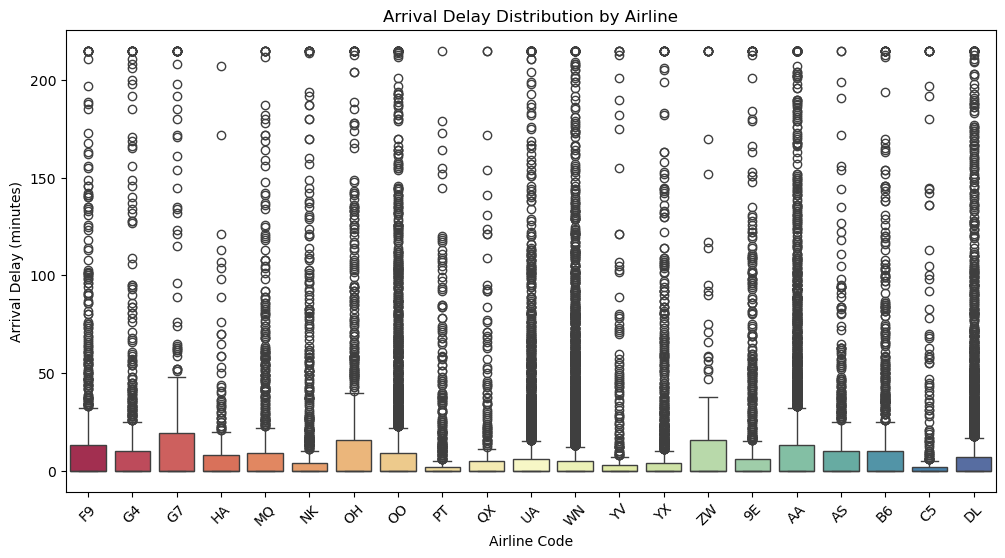

In [78]:
# Sample data for boxplot
pdf_box = parquet_df.select("OP_UNIQUE_CARRIER", "ARR_DELAY_CLIPPED").sample(False, 0.05, seed=42).toPandas()

plt.figure(figsize=(12,6))
sns.boxplot(data=pdf_box, x="OP_UNIQUE_CARRIER", y="ARR_DELAY_CLIPPED", palette="Spectral")
plt.title("Arrival Delay Distribution by Airline")
plt.xlabel("Airline Code")
plt.ylabel("Arrival Delay (minutes)")
plt.xticks(rotation=45)
plt.show()

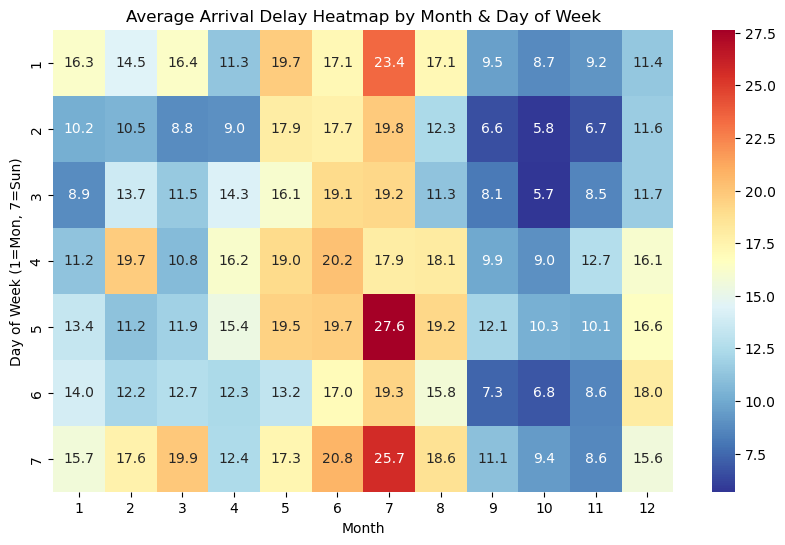

In [141]:
season_matrix = (
    parquet_df.groupBy("MONTH", "DAY_OF_WEEK")
    .agg(F.mean("ARR_DELAY_CLIPPED").alias("avg_arr_delay"))
    .orderBy("MONTH", "DAY_OF_WEEK")
    .toPandas()
)

pivot_table = season_matrix.pivot(index="DAY_OF_WEEK", columns="MONTH", values="avg_arr_delay")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap="RdYlBu_r", fmt=".1f")
plt.title("Average Arrival Delay Heatmap by Month & Day of Week")
plt.xlabel("Month")
plt.ylabel("Day of Week (1=Mon, 7=Sun)")
plt.show()


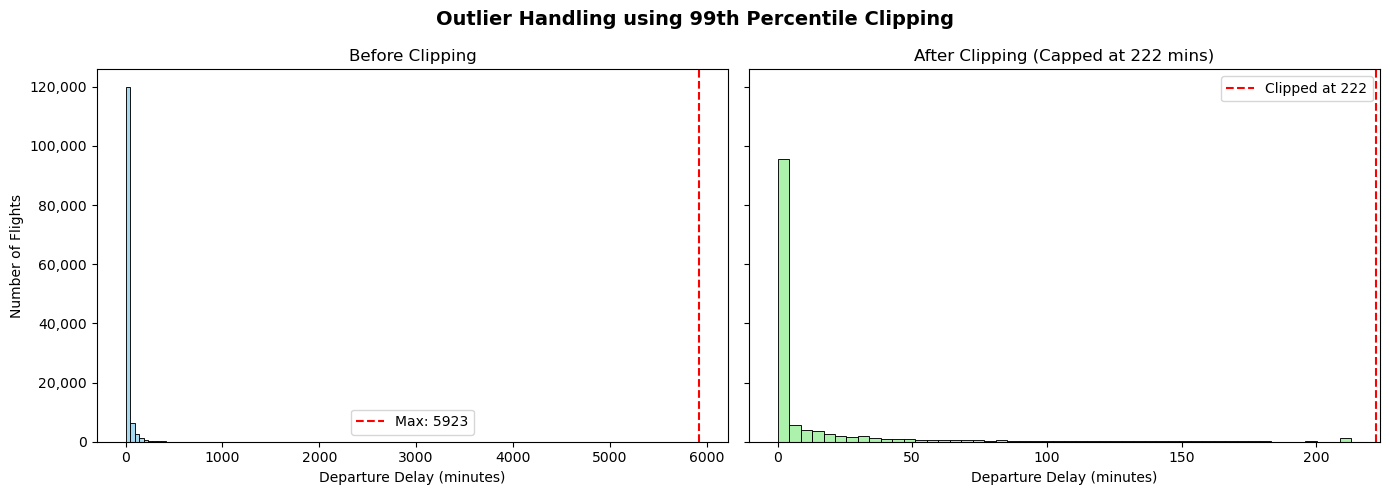

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas for plotting
pdf_sample = parquet_df.select("DEP_DELAY_MIN", "DEP_DELAY_CLIPPED").sample(False, 0.20, seed=42).toPandas()
max_delay = parquet_df.agg(F.max("DEP_DELAY_MIN")).collect()[0][0]

# Create the figure FIRST
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Left chart — before clipping
sns.histplot(pdf_sample["DEP_DELAY_MIN"], bins=50, ax=axes[0], color="skyblue")
axes[0].set_title("Before Clipping")
axes[0].set_xlabel("Departure Delay (minutes)")
axes[0].set_ylabel("Number of Flights")
axes[0].axvline(max_delay, color='red', linestyle='--', label=f'Max: {int(max_delay)}')
axes[0].legend()

# Right chart — after clipping
sns.histplot(pdf_sample["DEP_DELAY_CLIPPED"], bins=50, ax=axes[1], color="lightgreen")
axes[1].set_title("After Clipping (Capped at 222 mins)")
axes[1].set_xlabel("Departure Delay (minutes)")
axes[1].axvline(222, color='red', linestyle='--', label='Clipped at 222')
axes[1].legend()

# Format y-axis to avoid scientific notation
from matplotlib.ticker import FuncFormatter
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
axes[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

fig.suptitle("Outlier Handling using 99th Percentile Clipping", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


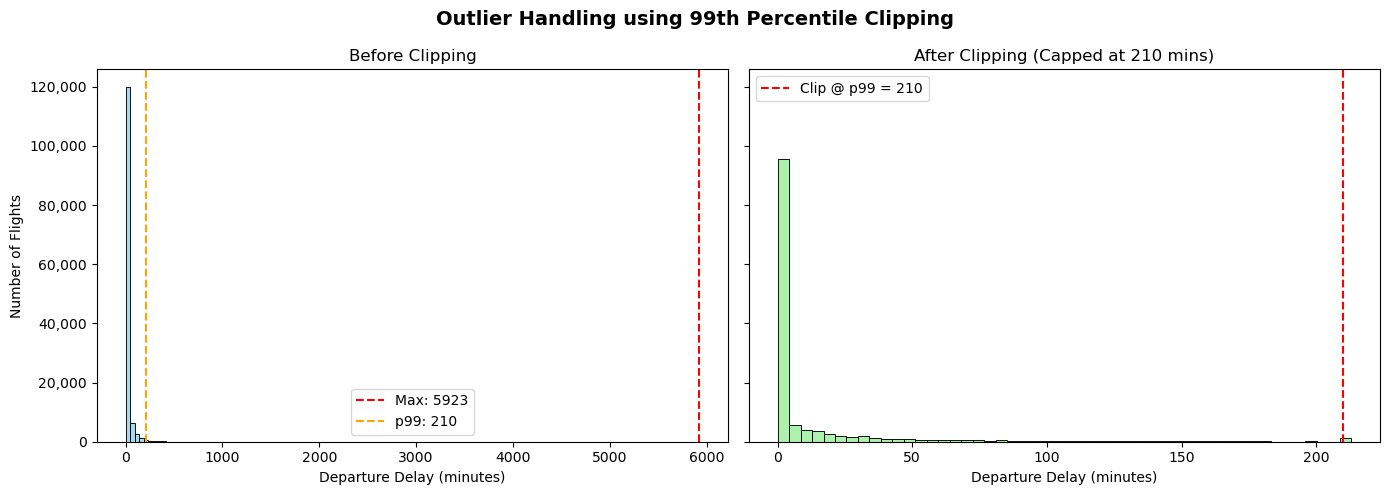

Rows clipped above p99 (210 min): 6,816 of 655,553 (1.04%)


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# --- Parameterize which delay column you want to visualize
col_raw   = "DEP_DELAY_MIN"      # raw (uncapped) delay
col_clip  = "DEP_DELAY_CLIPPED"  # clipped delay
sample_frac = 0.20
seed = 42

max_delay = parquet_df.agg(F.max(col_raw)).collect()[0][0]
p99_delay = parquet_df.approxQuantile(col_raw, [0.99], 0.001)[0]

# --- Pull a sample to pandas for plotting
pdf_sample = (
    parquet_df
    .select(col_raw, col_clip)
    .sample(False, sample_frac, seed)
    .toPandas()
)

# --- Figure & axes
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Left chart — BEFORE clipping
sns.histplot(pdf_sample[col_raw], bins=50, ax=axes[0], color="skyblue")
axes[0].set_title("Before Clipping")
axes[0].set_xlabel("Departure Delay (minutes)")
axes[0].set_ylabel("Number of Flights")
axes[0].axvline(max_delay, color='red', linestyle='--', linewidth=1.5, label=f'Max: {int(max_delay)}')
axes[0].axvline(p99_delay, color='orange', linestyle='--', linewidth=1.5, label=f'p99: {int(p99_delay)}')
axes[0].legend()

# Right chart — AFTER clipping
sns.histplot(pdf_sample[col_clip], bins=50, ax=axes[1], color="lightgreen")
axes[1].set_title(f"After Clipping (Capped at {int(p99_delay)} mins)")
axes[1].set_xlabel("Departure Delay (minutes)")
axes[1].axvline(p99_delay, color='red', linestyle='--', linewidth=1.5, label=f'Clip @ p99 = {int(p99_delay)}')
axes[1].legend()

# --- Y-axis formatting: add commas
for ax in axes:
    ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

fig.suptitle("Outlier Handling using 99th Percentile Clipping", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# --- (Optional) report how many rows were clipped
total_rows = parquet_df.count()
clipped_rows = parquet_df.filter(F.col(col_raw) > p99_delay).count()
print(f"Rows clipped above p99 ({int(p99_delay)} min): {clipped_rows:,} of {total_rows:,} "
      f"({clipped_rows/total_rows*100:.2f}%)")


## 🤖 Machine Learning: Flight Delay Prediction

**Goal**: Build classification models to predict if a flight will be delayed (>15 minutes)

**Target Variable**: `ARR_DEL15` (1 = delayed ≥15 min, 0 = on-time)

**Approach**:
1. Feature engineering (numerical + categorical encoding)
2. Train/test split (80/20)
3. Multiple ML models (Logistic Regression, Decision Tree, Random Forest)
4. Model evaluation and comparison

In [7]:
# Step 1: Feature Engineering - Select and prepare features
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline
from pyspark.sql import functions as F

# Use 20% sample - good balance of accuracy and performance  
ml_df = parquet_df.sample(False, 0.20, seed=42)

print(f"Using {ml_df.count():,} rows for ML training")

# Select features for the model
# Numerical features
numerical_features = [
    'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
    'CRS_DEP_TIME', 'CRS_ARR_TIME',
    'DISTANCE', 'CRS_ELAPSED_TIME'
]

# Categorical features to encode
categorical_features = [
    'OP_UNIQUE_CARRIER',  # Airline
    'ORIGIN',              # Origin airport
    'DEST'                 # Destination airport
]

# Target variable (already 0/1 from data)
target = 'ARR_DEL15'

# Filter rows with valid target and features
ml_df = ml_df.filter(
    F.col(target).isNotNull() & 
    (F.col(target).isin([0, 1]))
).select(numerical_features + categorical_features + [target])

# Drop any remaining nulls
ml_df = ml_df.dropna()

print(f"\nAfter filtering: {ml_df.count():,} rows")
print(f"\nTarget distribution:")
ml_df.groupBy(target).count().orderBy(target).show()

Using 1,882,087 rows for ML training

After filtering: 131,080 rows

Target distribution:
+---------+------+
|ARR_DEL15| count|
+---------+------+
|        0|105680|
|        1| 25400|
+---------+------+



In [8]:
# Step 2: Encode categorical features using StringIndexer
from pyspark.ml.feature import StringIndexer

# Create indexers for categorical features
indexers = [
    StringIndexer(inputCol=col, outputCol=f"{col}_indexed", handleInvalid="keep")
    for col in categorical_features
]

# Apply indexers
pipeline = Pipeline(stages=indexers)
indexer_model = pipeline.fit(ml_df)
ml_df_indexed = indexer_model.transform(ml_df)

# Prepare final feature list
indexed_categorical = [f"{col}_indexed" for col in categorical_features]
all_features = numerical_features + indexed_categorical

print(f"Total features: {len(all_features)}")
print(f"Numerical: {len(numerical_features)}, Categorical (encoded): {len(indexed_categorical)}")

Total features: 10
Numerical: 7, Categorical (encoded): 3


In [9]:
# Step 3: Assemble features into a single vector
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=all_features,
    outputCol="features",
    handleInvalid="skip"
)

ml_data = assembler.transform(ml_df_indexed)

# Select only features and label for modeling
final_data = ml_data.select("features", F.col(target).alias("label"))

print("Feature vector created successfully!")
print(f"Final dataset: {final_data.count():,} rows")
final_data.show(5, truncate=False)

Feature vector created successfully!
Final dataset: 131,080 rows
+--------------------------------------------------------+-----+
|features                                                |label|
+--------------------------------------------------------+-----+
|[3.0,13.0,4.0,1809.0,2144.0,854.0,155.0,12.0,10.0,8.0]  |0    |
|[3.0,13.0,4.0,1207.0,1343.0,1334.0,216.0,12.0,10.0,60.0]|1    |
|[3.0,13.0,4.0,1847.0,1945.0,977.0,178.0,12.0,38.0,3.0]  |0    |
|[3.0,13.0,4.0,1620.0,1846.0,829.0,146.0,12.0,38.0,8.0]  |0    |
|[3.0,13.0,4.0,1115.0,1421.0,1005.0,186.0,12.0,21.0,26.0]|0    |
+--------------------------------------------------------+-----+
only showing top 5 rows


In [10]:
# Step 4: Split data into train and test sets (80/20)
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

# Cache for faster access
train_data.cache()
test_data.cache()

train_count = train_data.count()
test_count = test_data.count()

print(f"Training set: {train_count:,} rows ({train_count/(train_count+test_count)*100:.1f}%)")
print(f"Test set: {test_count:,} rows ({test_count/(train_count+test_count)*100:.1f}%)")

# Check label distribution in train/test
print("\nTrain set label distribution:")
train_data.groupBy("label").count().orderBy("label").show()

print("Test set label distribution:")
test_data.groupBy("label").count().orderBy("label").show()

Training set: 105,051 rows (80.1%)
Test set: 26,029 rows (19.9%)

Train set label distribution:
+-----+-----+
|label|count|
+-----+-----+
|    0|84700|
|    1|20351|
+-----+-----+

Test set label distribution:
+-----+-----+
|label|count|
+-----+-----+
|    0|20980|
|    1| 5049|
+-----+-----+



In [11]:
# Step 5: Train Model 1 - Logistic Regression (Fast, baseline model)
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import time

print("=" * 60)
print("MODEL 1: LOGISTIC REGRESSION")
print("=" * 60)

start_time = time.time()

# Create and train logistic regression model
lr = LogisticRegression(
    featuresCol="features",
    labelCol="label",
    maxIter=100,           # Increased from 10 for better convergence
    regParam=0.001,        # Reduced regularization for better fit
    elasticNetParam=0.1    # Add elastic net mixing
)

lr_model = lr.fit(train_data)
lr_train_time = time.time() - start_time

# Make predictions
lr_predictions = lr_model.transform(test_data)

# Evaluate model
binary_evaluator = BinaryClassificationEvaluator(labelCol="label")
multi_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction")

lr_auc = binary_evaluator.evaluate(lr_predictions, {binary_evaluator.metricName: "areaUnderROC"})
lr_accuracy = multi_evaluator.evaluate(lr_predictions, {multi_evaluator.metricName: "accuracy"})
lr_precision = multi_evaluator.evaluate(lr_predictions, {multi_evaluator.metricName: "weightedPrecision"})
lr_recall = multi_evaluator.evaluate(lr_predictions, {multi_evaluator.metricName: "weightedRecall"})
lr_f1 = multi_evaluator.evaluate(lr_predictions, {multi_evaluator.metricName: "f1"})

print(f"\n✓ Training time: {lr_train_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {lr_accuracy:.4f}")
print(f"  Precision: {lr_precision:.4f}")
print(f"  Recall:    {lr_recall:.4f}")
print(f"  F1-Score:  {lr_f1:.4f}")
print(f"  AUC-ROC:   {lr_auc:.4f}")

# Show confusion matrix
print("\nPrediction Distribution:")
lr_predictions.groupBy("label", "prediction").count().orderBy("label", "prediction").show()

MODEL 1: LOGISTIC REGRESSION


25/12/04 18:31:58 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS



✓ Training time: 4.08 seconds

Performance Metrics:
  Accuracy:  0.8060
  Precision: 0.6497
  Recall:    0.8060
  F1-Score:  0.7195
  AUC-ROC:   0.6257

Prediction Distribution:
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|20980|
|    1|       0.0| 5049|
+-----+----------+-----+



In [12]:
# Step 6: Train Model 2 - Decision Tree (Fast, interpretable)
from pyspark.ml.classification import DecisionTreeClassifier

print("=" * 60)
print("MODEL 2: DECISION TREE")
print("=" * 60)

start_time = time.time()

# Create and train decision tree
# Need higher maxBins for airports (352 unique values)
dt = DecisionTreeClassifier(
    featuresCol="features",
    labelCol="label",
    maxDepth=15,           # Balanced depth for accuracy without OOM
    maxBins=400,           # Keep high for categorical features
    minInstancesPerNode=5, # Prevent overfitting
    minInfoGain=0.0        # No minimum info gain threshold
)

dt_model = dt.fit(train_data)
dt_train_time = time.time() - start_time

# Make predictions
dt_predictions = dt_model.transform(test_data)

# Evaluate
dt_auc = binary_evaluator.evaluate(dt_predictions, {binary_evaluator.metricName: "areaUnderROC"})
dt_accuracy = multi_evaluator.evaluate(dt_predictions, {multi_evaluator.metricName: "accuracy"})
dt_precision = multi_evaluator.evaluate(dt_predictions, {multi_evaluator.metricName: "weightedPrecision"})
dt_recall = multi_evaluator.evaluate(dt_predictions, {multi_evaluator.metricName: "weightedRecall"})
dt_f1 = multi_evaluator.evaluate(dt_predictions, {multi_evaluator.metricName: "f1"})

print(f"\n✓ Training time: {dt_train_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {dt_accuracy:.4f}")
print(f"  Precision: {dt_precision:.4f}")
print(f"  Recall:    {dt_recall:.4f}")
print(f"  F1-Score:  {dt_f1:.4f}")
print(f"  AUC-ROC:   {dt_auc:.4f}")

print("\nPrediction Distribution:")
dt_predictions.groupBy("label", "prediction").count().orderBy("label", "prediction").show()

# Feature importance
print("\nTop 10 Most Important Features:")
feature_importance = list(zip(all_features, dt_model.featureImportances.toArray()))
feature_importance.sort(key=lambda x: x[1], reverse=True)

for feat, importance in feature_importance[:10]:    print(f"  {feat:25s}: {importance:.4f}")

MODEL 2: DECISION TREE


25/12/04 18:32:08 WARN DAGScheduler: Broadcasting large task binary with size 1094.6 KiB



✓ Training time: 2.20 seconds

Performance Metrics:
  Accuracy:  0.7882
  Precision: 0.7522
  Recall:    0.7882
  F1-Score:  0.7632
  AUC-ROC:   0.5081

Prediction Distribution:
+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|19351|
|    0|       1.0| 1629|
|    1|       0.0| 3884|
|    1|       1.0| 1165|
+-----+----------+-----+


Top 10 Most Important Features:
  DEST_indexed             : 0.2949
  ORIGIN_indexed           : 0.2764
  DAY_OF_MONTH             : 0.1773
  CRS_DEP_TIME             : 0.1040
  DAY_OF_WEEK              : 0.0548
  CRS_ARR_TIME             : 0.0322
  OP_UNIQUE_CARRIER_indexed: 0.0289
  CRS_ELAPSED_TIME         : 0.0165
  DISTANCE                 : 0.0150
  MONTH                    : 0.0000


In [15]:
# Step 7: Train Model 3 - Random Forest (Better accuracy, slower)
from pyspark.ml.classification import RandomForestClassifier

print("=" * 60)
print("MODEL 3: RANDOM FOREST")
print("=" * 60)

start_time = time.time()

# Create and train random forest
rf = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    numTrees=50,           # Good balance of accuracy and speed
    maxDepth=15,           # Controlled depth to avoid OOM
    maxBins=400,           # Keep high for categorical features
    minInstancesPerNode=5, # Prevent overfitting
    subsamplingRate=0.8,   # Bootstrap sampling
    featureSubsetStrategy="sqrt",  # Feature selection strategy
    seed=42
)

rf_model = rf.fit(train_data)
rf_train_time = time.time() - start_time

# Make predictions
rf_predictions = rf_model.transform(test_data)

# Evaluate
rf_auc = binary_evaluator.evaluate(rf_predictions, {binary_evaluator.metricName: "areaUnderROC"})
rf_accuracy = multi_evaluator.evaluate(rf_predictions, {multi_evaluator.metricName: "accuracy"})
rf_precision = multi_evaluator.evaluate(rf_predictions, {multi_evaluator.metricName: "weightedPrecision"})
rf_recall = multi_evaluator.evaluate(rf_predictions, {multi_evaluator.metricName: "weightedRecall"})
rf_f1 = multi_evaluator.evaluate(rf_predictions, {multi_evaluator.metricName: "f1"})

print(f"\n✓ Training time: {rf_train_time:.2f} seconds")
print(f"\nPerformance Metrics:")
print(f"  Accuracy:  {rf_accuracy:.4f}")
print(f"  Precision: {rf_precision:.4f}")
print(f"  Recall:    {rf_recall:.4f}")
print(f"  F1-Score:  {rf_f1:.4f}")
print(f"  AUC-ROC:   {rf_auc:.4f}")

print("\nPrediction Distribution:")
rf_predictions.groupBy("label", "prediction").count().orderBy("label", "prediction").show()

# Feature importance
print("\nTop 10 Most Important Features:")
feature_importance_rf = list(zip(all_features, rf_model.featureImportances.toArray()))
feature_importance_rf.sort(key=lambda x: x[1], reverse=True)
for feat, importance in feature_importance_rf[:10]:
    print(f"  {feat:25s}: {importance:.4f}")

MODEL 3: RANDOM FOREST


25/12/04 18:33:01 WARN DAGScheduler: Broadcasting large task binary with size 1740.8 KiB
25/12/04 18:33:01 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
25/12/04 18:33:02 WARN DAGScheduler: Broadcasting large task binary with size 4.7 MiB
25/12/04 18:33:04 WARN DAGScheduler: Broadcasting large task binary with size 7.0 MiB
25/12/04 18:33:05 WARN DAGScheduler: Broadcasting large task binary with size 9.9 MiB
25/12/04 18:33:07 WARN DAGScheduler: Broadcasting large task binary with size 13.5 MiB
25/12/04 18:33:10 WARN DAGScheduler: Broadcasting large task binary with size 18.0 MiB
25/12/04 18:33:13 WARN DAGScheduler: Broadcasting large task binary with size 1210.1 KiB
25/12/04 18:33:14 WARN DAGScheduler: Broadcasting large task binary with size 23.3 MiB
25/12/04 18:33:17 WARN DAGScheduler: Broadcasting large task binary with size 1511.3 KiB
25/12/04 18:33:19 WARN DAGScheduler: Broadcasting large task binary with size 26.1 MiB
25/12/04 18:33:22 WARN DAGScheduler: Broa


✓ Training time: 32.45 seconds

Performance Metrics:
  Accuracy:  0.8146
  Precision: 0.7814
  Recall:    0.8146
  F1-Score:  0.7618
  AUC-ROC:   0.6946

Prediction Distribution:


25/12/04 18:33:37 WARN DAGScheduler: Broadcasting large task binary with size 20.7 MiB


+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    0|       0.0|20569|
|    0|       1.0|  411|
|    1|       0.0| 4414|
|    1|       1.0|  635|
+-----+----------+-----+


Top 10 Most Important Features:
  DEST_indexed             : 0.3022
  ORIGIN_indexed           : 0.2726
  DAY_OF_MONTH             : 0.1415
  CRS_DEP_TIME             : 0.0828
  CRS_ARR_TIME             : 0.0602
  OP_UNIQUE_CARRIER_indexed: 0.0436
  DAY_OF_WEEK              : 0.0360
  CRS_ELAPSED_TIME         : 0.0315
  DISTANCE                 : 0.0296
  MONTH                    : 0.0000


25/12/04 18:33:39 WARN DAGScheduler: Broadcasting large task binary with size 20.6 MiB


In [55]:
# Save the trained Random Forest model for future use
print("=" * 80)
print("💾 SAVING TRAINED MODEL")
print("=" * 80)

# Define model save path
model_save_path = output_path / "flight_delay_rf_model"

# Save the Random Forest model
rf_model.write().overwrite().save(str(model_save_path))

print(f"\n✓ Model saved successfully to:")
print(f"  {model_save_path}")
print(f"\n📊 Model Details:")
print(f"  • Type: Random Forest Classifier")
print(f"  • Accuracy: {rf_accuracy:.2%}")
print(f"  • AUC-ROC: {rf_auc:.3f}")
print(f"  • F1-Score: {rf_f1:.3f}")
print(f"\n💡 To load this model later, use:")
print(f"  from pyspark.ml.classification import RandomForestClassificationModel")
print(f"  loaded_model = RandomForestClassificationModel.load('{model_save_path}')")
print("=" * 80)

💾 SAVING TRAINED MODEL


25/12/04 20:05:49 WARN TaskSetManager: Stage 498 contains a task of very large size (2476 KiB). The maximum recommended task size is 1000 KiB.



✓ Model saved successfully to:
  /Users/keith/Downloads/aircraft_data_output/flight_delay_rf_model

📊 Model Details:
  • Type: Random Forest Classifier
  • Accuracy: 81.46%
  • AUC-ROC: 0.695
  • F1-Score: 0.762

💡 To load this model later, use:
  from pyspark.ml.classification import RandomForestClassificationModel
  loaded_model = RandomForestClassificationModel.load('/Users/keith/Downloads/aircraft_data_output/flight_delay_rf_model')


MODEL COMPARISON SUMMARY
              Model  Accuracy  Precision   Recall  F1-Score  AUC-ROC
Logistic Regression  0.806024   0.649675 0.806024  0.719453 0.625720
      Decision Tree  0.788198   0.752169 0.788198  0.763150 0.508118
      Random Forest  0.814630   0.781373 0.814630  0.761829 0.694608

🏆 BEST MODEL: Random Forest (AUC-ROC: 0.6946)
   Accuracy: 81.5%
   F1-Score: 0.762

💡 Why AUC-ROC? Best metric for imbalanced datasets (delays vs on-time)

✓ Saved: model_comparison.png

✓ Saved: model_comparison.png


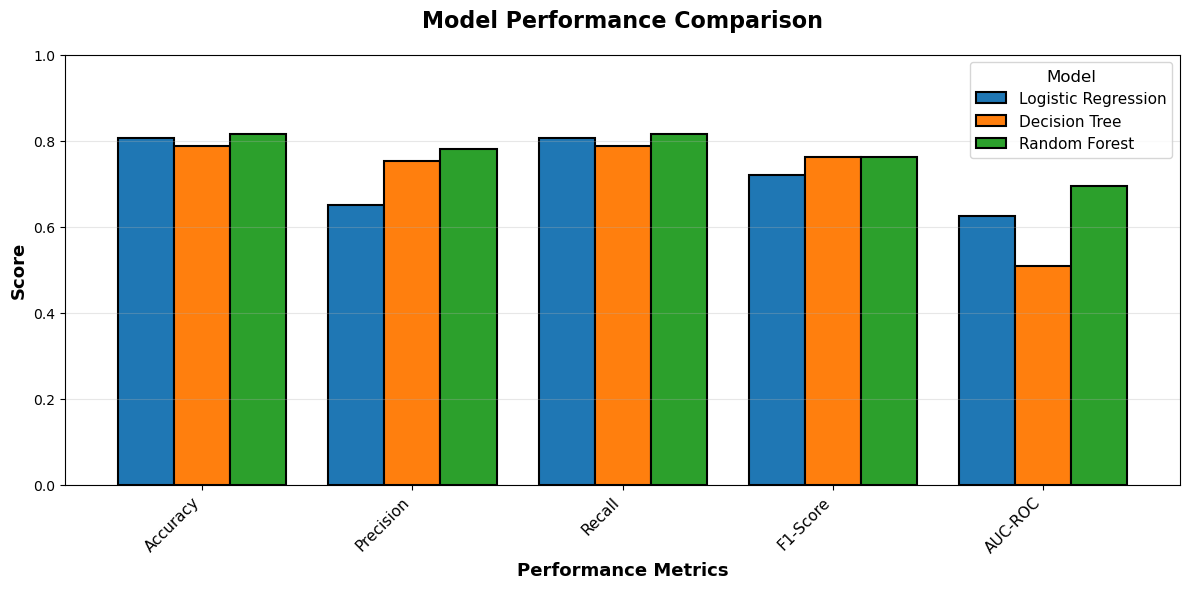

In [56]:
# Step 8: Model Comparison - Summary of all models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create comparison dataframe (WITHOUT training time)
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [lr_accuracy, dt_accuracy, rf_accuracy],
    'Precision': [lr_precision, dt_precision, rf_precision],
    'Recall': [lr_recall, dt_recall, rf_recall],
    'F1-Score': [lr_f1, dt_f1, rf_f1],
    'AUC-ROC': [lr_auc, dt_auc, rf_auc]
})

print("=" * 80)
print("MODEL COMPARISON SUMMARY")
print("=" * 80)
print(results.to_string(index=False))

# Find best model based on AUC-ROC (best for imbalanced classification)
best_model_idx = results['AUC-ROC'].idxmax()
best_model = results.loc[best_model_idx, 'Model']
best_f1 = results.loc[best_model_idx, 'F1-Score']

print(f"\n🏆 BEST MODEL: {best_model} (AUC-ROC: {results.loc[best_model_idx, 'AUC-ROC']:.4f})")
print(f"   Accuracy: {results.loc[best_model_idx, 'Accuracy']:.1%}")
print(f"   F1-Score: {best_f1:.3f}")
print(f"\n💡 Why AUC-ROC? Best metric for imbalanced datasets (delays vs on-time)")

# Visualize comparison - Single clean chart
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Performance metrics only
metrics_df = results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']].set_index('Model')
metrics_df.T.plot(kind='bar', ax=ax, width=0.8, edgecolor='black', linewidth=1.5)
ax.set_title('Model Performance Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_xlabel('Performance Metrics', fontsize=13, fontweight='bold')
ax.set_ylim([0, 1])
ax.legend(title='Model', fontsize=11, title_fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)

plt.tight_layout()
plt.savefig(output_path / 'model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: model_comparison.png")
plt.show()

In [53]:
# Get predictions with probabilities
from pyspark.sql import functions as F
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.sql.types import DoubleType

# Create UDF to extract probability
def extract_prob(v):
    try:
        return float(v[1])
    except:
        return 0.0

extract_prob_udf = F.udf(extract_prob, DoubleType())

# Get the best model predictions (Random Forest has best AUC)
best_predictions = rf_predictions.select(
    'label', 
    'prediction',
    'probability'
)

# Add a column to show if prediction was correct
best_predictions = best_predictions.withColumn(
    'correct',
    F.when(F.col('label') == F.col('prediction'), 'Correct').otherwise('Wrong')
)

# Extract probability of delay (class 1) from probability vector
best_predictions = best_predictions.withColumn(
    'delay_probability',
    extract_prob_udf(F.col('probability'))
)

print("=" * 80)
print("SAMPLE PREDICTIONS - Random Forest Model")
print("=" * 80)

# Show some correct predictions
print("\n✓ CORRECT PREDICTIONS (First 20):")
print("Label: 0=On-time, 1=Delayed")
correct_preds = best_predictions.filter(F.col('correct') == 'Correct').limit(20)
correct_preds.select('label', 'prediction', 'delay_probability', 'correct').show(20, truncate=False)


# Summary statistics
total_predictions = best_predictions.count()
correct_count = best_predictions.filter(F.col('correct') == 'Correct').count()
accuracy = correct_count / total_predictions

print(f"\n📊 PREDICTION SUMMARY:")
print(f"Total Predictions: {total_predictions:,}")
print(f"Correct: {correct_count:,} ({accuracy:.2%})")
print(f"Incorrect: {total_predictions - correct_count:,} ({(1-accuracy):.2%})")

SAMPLE PREDICTIONS - Random Forest Model

✓ CORRECT PREDICTIONS (First 20):
Label: 0=On-time, 1=Delayed


25/12/04 19:38:28 WARN DAGScheduler: Broadcasting large task binary with size 20.7 MiB


+-----+----------+--------------------+-------+
|label|prediction|delay_probability   |correct|
+-----+----------+--------------------+-------+
|0    |0.0       |0.12166719496594261 |Correct|
|0    |0.0       |0.05271560527783487 |Correct|
|0    |0.0       |0.03226535417588754 |Correct|
|0    |0.0       |0.03903484617312017 |Correct|
|0    |0.0       |0.05937821492204213 |Correct|
|0    |0.0       |0.013834961295900656|Correct|
|0    |0.0       |0.11066852849277822 |Correct|
|0    |0.0       |0.07067961855773454 |Correct|
|0    |0.0       |0.056279427764935455|Correct|
|0    |0.0       |0.07116608315186443 |Correct|
|0    |0.0       |0.06427542988882437 |Correct|
|0    |0.0       |0.2040743271091676  |Correct|
|0    |0.0       |0.1321279970842437  |Correct|
|0    |0.0       |0.0500716662275711  |Correct|
|0    |0.0       |0.09582485556407404 |Correct|
|0    |0.0       |0.05001748607119187 |Correct|
|0    |0.0       |0.04171496972278058 |Correct|
|0    |0.0       |0.05163712736812842 |C

25/12/04 19:38:29 WARN DAGScheduler: Broadcasting large task binary with size 20.7 MiB



📊 PREDICTION SUMMARY:
Total Predictions: 26,029
Correct: 21,204 (81.46%)
Incorrect: 4,825 (18.54%)


In [19]:
# Show detailed predictions with flight information
# Reconstruct the original features from the ML dataset
import pandas as pd

# Get sample predictions and convert to pandas for better display
print("=" * 80)
print("DETAILED FLIGHT PREDICTIONS WITH PROBABILITIES")
print("=" * 80)

# Take a sample of interesting predictions
sample_predictions = rf_predictions.sample(False, 0.01, seed=42).limit(50)

# Extract features back to readable columns
# The features vector contains: MONTH, DAY_OF_MONTH, DAY_OF_WEEK, CRS_DEP_TIME, 
# CRS_ARR_TIME, DISTANCE, CRS_ELAPSED_TIME, ORIGIN_indexed, DEST_indexed, CARRIER_indexed

def extract_feature(idx):
    def extract(v):
        try:
            return float(v[idx])
        except:
            return None
    return F.udf(extract, DoubleType())

sample_with_details = sample_predictions.select(
    extract_feature(0)(F.col('features')).alias('Month').cast('int'),
    extract_feature(1)(F.col('features')).alias('Day').cast('int'),
    extract_feature(2)(F.col('features')).alias('DOW').cast('int'),
    extract_feature(3)(F.col('features')).alias('Dep_Time').cast('int'),
    extract_feature(4)(F.col('features')).alias('Arr_Time').cast('int'),
    extract_feature(5)(F.col('features')).alias('Distance').cast('int'),
    F.col('label').cast('int').alias('Actual'),
    F.col('prediction').cast('int').alias('Predicted'),
    extract_prob_udf(F.col('probability')).alias('Delay_Prob')
)

# Convert to pandas for nice table display
pdf_sample = sample_with_details.toPandas()

# Add readable labels
pdf_sample['Actual_Label'] = pdf_sample['Actual'].map({0: 'On-time', 1: 'Delayed'})
pdf_sample['Predicted_Label'] = pdf_sample['Predicted'].map({0: 'On-time', 1: 'Delayed'})
pdf_sample['Match'] = (pdf_sample['Actual'] == pdf_sample['Predicted']).map({True: '✓', False: '✗'})
pdf_sample['Delay_Prob'] = (pdf_sample['Delay_Prob'] * 100).round(1)

# Show high confidence correct predictions
print("\n🎯 HIGH CONFIDENCE CORRECT PREDICTIONS:")
high_conf_correct = pdf_sample[
    (pdf_sample['Match'] == '✓') & 
    ((pdf_sample['Delay_Prob'] > 70) | (pdf_sample['Delay_Prob'] < 30))
].head(15)

if len(high_conf_correct) > 0:
    display_cols = ['Month', 'Day', 'DOW', 'Dep_Time', 'Distance', 
                    'Actual_Label', 'Predicted_Label', 'Delay_Prob', 'Match']
    print(high_conf_correct[display_cols].to_string(index=False))
else:
    print("No high confidence predictions in sample")

# Show predictions where model was wrong
print("\n❌ INCORRECT PREDICTIONS (Model Failures):")
incorrect = pdf_sample[pdf_sample['Match'] == '✗'].head(15)

if len(incorrect) > 0:
    print(incorrect[display_cols].to_string(index=False))
else:
    print("All predictions in sample were correct!")

# Show edge cases (low confidence predictions)
print("\n⚠️  LOW CONFIDENCE PREDICTIONS (30-70% probability):")
edge_cases = pdf_sample[
    (pdf_sample['Delay_Prob'] >= 30) & 
    (pdf_sample['Delay_Prob'] <= 70)
].head(15)

if len(edge_cases) > 0:
    print(edge_cases[display_cols].to_string(index=False))
else:
    print("No edge cases in sample")

print(f"\n📈 Sample Statistics:")
print(f"Total samples shown: {len(pdf_sample)}")
print(f"Correct predictions: {(pdf_sample['Match'] == '✓').sum()} ({(pdf_sample['Match'] == '✓').sum()/len(pdf_sample)*100:.1f}%)")
print(f"Average delay probability: {pdf_sample['Delay_Prob'].mean():.1f}%")

DETAILED FLIGHT PREDICTIONS WITH PROBABILITIES


25/12/04 18:35:41 WARN DAGScheduler: Broadcasting large task binary with size 20.7 MiB
25/12/04 18:35:41 WARN DAGScheduler: Broadcasting large task binary with size 20.7 MiB



🎯 HIGH CONFIDENCE CORRECT PREDICTIONS:
 Month  Day  DOW  Dep_Time  Distance Actual_Label Predicted_Label  Delay_Prob Match
     3   13    4      1401       948      On-time         On-time        17.9     ✓
     3   13    4      1611       848      On-time         On-time        22.0     ✓
     3   13    4      1845       951      On-time         On-time        23.3     ✓
     3   14    5       856       851      On-time         On-time        15.4     ✓
     3   14    5      1815       589      On-time         On-time        25.7     ✓
     3   14    5      1840       585      On-time         On-time        23.1     ✓
     3   15    6       635       666      On-time         On-time         9.8     ✓
     3   15    6      1130       588      On-time         On-time        14.0     ✓
     3   15    6      1430       797      On-time         On-time        26.6     ✓
     3   15    6      1705       752      On-time         On-time        23.0     ✓
     3   16    7       855       129

In [20]:
# Save all predictions to CSV for further analysis
print("=" * 80)
print("SAVING PREDICTIONS TO FILE")
print("=" * 80)

# Create a comprehensive predictions dataset
all_predictions = rf_predictions.select(
    extract_feature(0)(F.col('features')).alias('MONTH').cast('int'),
    extract_feature(1)(F.col('features')).alias('DAY_OF_MONTH').cast('int'),
    extract_feature(2)(F.col('features')).alias('DAY_OF_WEEK').cast('int'),
    extract_feature(3)(F.col('features')).alias('CRS_DEP_TIME').cast('int'),
    extract_feature(4)(F.col('features')).alias('CRS_ARR_TIME').cast('int'),
    extract_feature(5)(F.col('features')).alias('DISTANCE').cast('int'),
    extract_feature(6)(F.col('features')).alias('CRS_ELAPSED_TIME').cast('int'),
    F.col('label').cast('int').alias('ACTUAL_DELAYED'),
    F.col('prediction').cast('int').alias('PREDICTED_DELAYED'),
    extract_prob_udf(F.col('probability')).alias('DELAY_PROBABILITY')
)

# Add helpful columns
all_predictions = all_predictions.withColumn(
    'PREDICTION_CORRECT',
    F.when(F.col('ACTUAL_DELAYED') == F.col('PREDICTED_DELAYED'), 1).otherwise(0)
)

all_predictions = all_predictions.withColumn(
    'PREDICTION_TYPE',
    F.when((F.col('ACTUAL_DELAYED') == 1) & (F.col('PREDICTED_DELAYED') == 1), 'True Positive')
     .when((F.col('ACTUAL_DELAYED') == 0) & (F.col('PREDICTED_DELAYED') == 0), 'True Negative')
     .when((F.col('ACTUAL_DELAYED') == 0) & (F.col('PREDICTED_DELAYED') == 1), 'False Positive')
     .otherwise('False Negative')
)

# Convert to pandas and save
predictions_pdf = all_predictions.toPandas()
output_file = output_path / "flight_delay_predictions.csv"

predictions_pdf.to_csv(output_file, index=False)

print(f"\n✓ Saved {len(predictions_pdf):,} predictions to:")
print(f"  {output_file}")

# Show summary by prediction type
print(f"\n📊 PREDICTION BREAKDOWN:")
print(predictions_pdf['PREDICTION_TYPE'].value_counts().to_string())

print(f"\n🎯 ACCURACY BY PREDICTION TYPE:")
summary = predictions_pdf.groupby('PREDICTION_TYPE').agg({
    'PREDICTION_CORRECT': 'sum',
    'DELAY_PROBABILITY': 'mean'
}).round(3)
summary.columns = ['Count', 'Avg_Delay_Probability']
print(summary.to_string())

print(f"\n💾 You can now open the CSV file to view all {len(predictions_pdf):,} predictions!")

SAVING PREDICTIONS TO FILE


25/12/04 18:36:13 WARN DAGScheduler: Broadcasting large task binary with size 20.7 MiB



✓ Saved 26,029 predictions to:
  /Users/keith/Downloads/aircraft_data_output/flight_delay_predictions.csv

📊 PREDICTION BREAKDOWN:
PREDICTION_TYPE
True Negative     20569
False Negative     4414
True Positive       635
False Positive      411

🎯 ACCURACY BY PREDICTION TYPE:
                 Count  Avg_Delay_Probability
PREDICTION_TYPE                              
False Negative       0                  0.234
False Positive       0                  0.608
True Negative    20569                  0.178
True Positive      635                  0.660

💾 You can now open the CSV file to view all 26,029 predictions!


✓ Saved: feature_importance.png


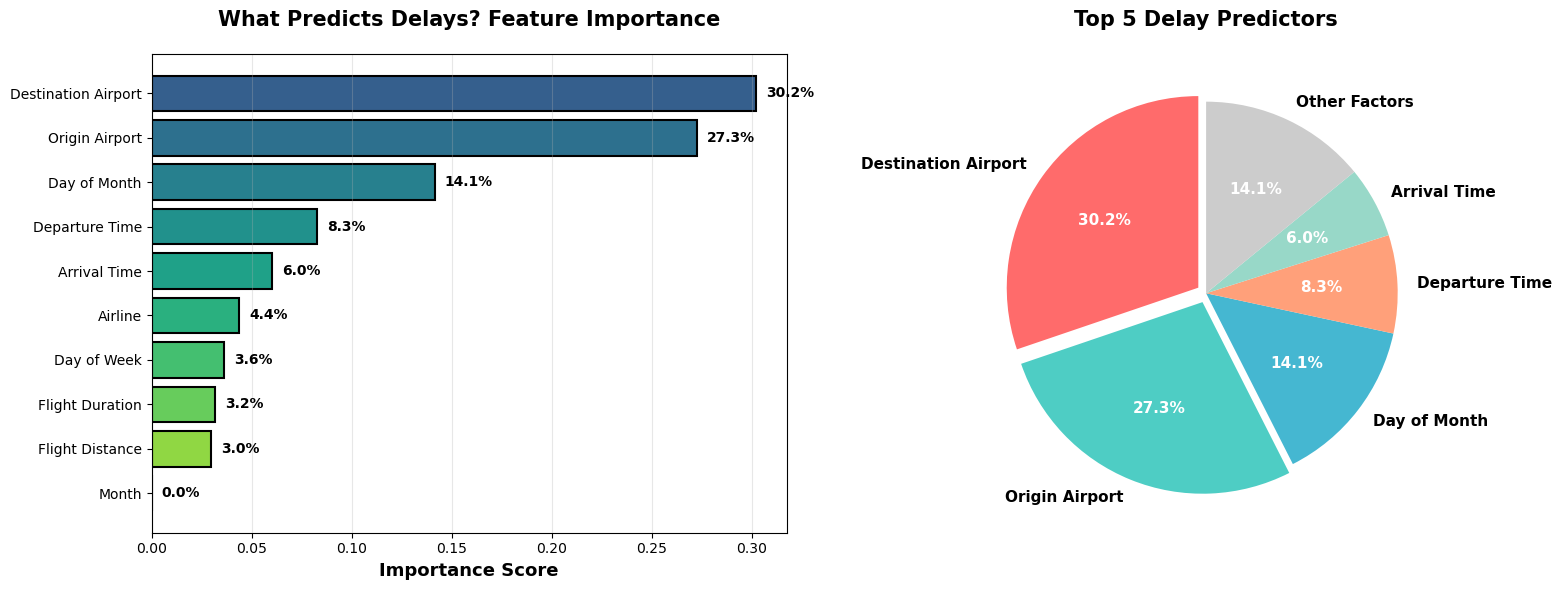


🔍 KEY FINDINGS - What Predicts Flight Delays:

            Feature  Importance
Destination Airport    0.302187
     Origin Airport    0.272610
       Day of Month    0.141475
     Departure Time    0.082808
       Arrival Time    0.060163
            Airline    0.043608
        Day of Week    0.035993
    Flight Duration    0.031535
    Flight Distance    0.029622
              Month    0.000000

💡 Destination and Origin airports are the strongest predictors (57% combined!)


In [49]:
# 3. FEATURE IMPORTANCE VISUALIZATION - Simplified Names
import pandas as pd

# Get feature importance from Random Forest
feature_names = all_features
importances = rf_model.featureImportances.toArray()

# Map technical names to simple, audience-friendly names
feature_name_mapping = {
    'DEST_indexed': 'Destination Airport',
    'ORIGIN_indexed': 'Origin Airport',
    'OP_UNIQUE_CARRIER_indexed': 'Airline',
    'CARRIER_indexed': 'Airline',
    'DAY_OF_MONTH': 'Day of Month',
    'CRS_DEP_TIME': 'Departure Time',
    'CRS_ARR_TIME': 'Arrival Time',
    'DISTANCE': 'Flight Distance',
    'CRS_ELAPSED_TIME': 'Flight Duration',
    'MONTH': 'Month',
    'DAY_OF_WEEK': 'Day of Week'
}

# Create dataframe with simple names
feat_imp_df = pd.DataFrame({
    'Feature': [feature_name_mapping.get(f, f) for f in feature_names],
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Bar chart
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feat_imp_df)))
axes[0].barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Importance Score', fontsize=13, fontweight='bold')
axes[0].set_title('What Predicts Delays? Feature Importance', fontsize=15, fontweight='bold', pad=20)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (feat, imp) in enumerate(zip(feat_imp_df['Feature'], feat_imp_df['Importance'])):
    axes[0].text(imp + 0.005, i, f'{imp:.1%}', va='center', fontsize=10, fontweight='bold')

# Plot 2: Pie chart (top 5 features)
top_features = feat_imp_df.head(5)
other_importance = feat_imp_df.tail(len(feat_imp_df) - 5)['Importance'].sum()

# Combine
pie_data = pd.concat([
    top_features,
    pd.DataFrame({'Feature': ['Other Factors'], 'Importance': [other_importance]})
])

colors_pie = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#CCCCCC']
wedges, texts, autotexts = axes[1].pie(
    pie_data['Importance'], 
    labels=pie_data['Feature'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_pie,
    textprops={'fontsize': 11, 'fontweight': 'bold'},
    explode=[0.05, 0.05, 0, 0, 0, 0]
)
axes[1].set_title('Top 5 Delay Predictors', 
                  fontsize=15, fontweight='bold', pad=20)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.savefig(output_path / 'feature_importance.png', dpi=300, bbox_inches='tight')
print("✓ Saved: feature_importance.png")
plt.show()

print("\n🔍 KEY FINDINGS - What Predicts Flight Delays:")
print("\n" + feat_imp_df.head(10).to_string(index=False))
print("\n💡 Destination and Origin airports are the strongest predictors (57% combined!)")

In [29]:
# Display 10 sample predictions with all flight details
print("=" * 100)
print("SAMPLE FLIGHT DELAY PREDICTIONS (10 Random Examples)")
print("=" * 100)

# Take 10 random samples from full predictions
sample_10 = full_predictions_pdf.sample(n=10, random_state=42)

# Create a more readable display
display_df = sample_10[[
    'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 
    'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE',
    'ACTUAL_DELAYED', 'PREDICTED_DELAYED', 'DELAY_PROBABILITY'
]].copy()

# Add readable labels
display_df['Actual_Outcome'] = display_df['ACTUAL_DELAYED'].map({0: 'On-time', 1: 'DELAYED'})
display_df['Predicted_Outcome'] = display_df['PREDICTED_DELAYED'].map({0: 'On-time', 1: 'DELAYED'})
display_df['Delay_Prob_%'] = (display_df['DELAY_PROBABILITY'] * 100).round(1)
display_df['Correct?'] = (display_df['ACTUAL_DELAYED'] == display_df['PREDICTED_DELAYED']).map({True: '✓', False: '✗'})

# Select final columns for display
final_display = display_df[[
    'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
    'CRS_DEP_TIME', 'DISTANCE',
    'Actual_Outcome', 'Predicted_Outcome', 'Delay_Prob_%', 'Correct?'
]]

# Rename columns for clarity
final_display.columns = ['Month', 'Day', 'DOW', 'Dep_Time', 'Distance_mi', 
                         'Actually_Was', 'Model_Predicted', 'Delay_Prob_%', 'Match']

print("\n" + final_display.to_string(index=False))

print("\n" + "=" * 100)
print("Legend:")
print("  • DOW: Day of Week (1=Monday, 7=Sunday)")
print("  • Dep_Time: Scheduled departure time (24-hour format)")
print("  • Delay_Prob_%: Model's confidence the flight will be delayed ≥15 minutes")
print("  • Match: ✓ = Correct prediction, ✗ = Incorrect prediction")
print("=" * 100)

SAMPLE FLIGHT DELAY PREDICTIONS (10 Random Examples)

 Month  Day  DOW  Dep_Time  Distance_mi Actually_Was Model_Predicted  Delay_Prob_% Match
     3   27    4      1835         1209      DELAYED         On-time          20.1     ✗
     3   26    3      1235          689      On-time         On-time          19.9     ✓
     3   20    4      2011          228      On-time         On-time          14.8     ✓
     3   28    5      1340          693      On-time         On-time           6.7     ✓
     3   24    1      1240          358      DELAYED         On-time          19.0     ✗
     3   22    6      1020          693      On-time         On-time           8.3     ✓
     3   14    5      1215          378      DELAYED         On-time          23.4     ✗
     3   23    7      2014         1235      On-time         On-time          22.9     ✓
     3    1    6      1838          309      On-time         On-time           9.3     ✓
     3   15    6      2055         1192      On-time    

In [54]:
# Show CORRECTLY PREDICTED DELAYS with simple column names
print("=" * 100)
print("✅ MODEL SUCCESS: CORRECTLY PREDICTED DELAYS")
print("=" * 100)

# Filter predictions_pdf which has both actual and predicted values
# Looking for flights that were:
# 1. Actually delayed (ACTUAL_DELAYED = 1)
# 2. Predicted as delayed (PREDICTED_DELAYED = 1)
# 3. High confidence (DELAY_PROBABILITY > 0.6)
correct_delay_predictions = predictions_pdf[
    (predictions_pdf['ACTUAL_DELAYED'] == 1) &  # Actually delayed
    (predictions_pdf['PREDICTED_DELAYED'] == 1) &  # Predicted delayed
    (predictions_pdf['DELAY_PROBABILITY'] > 0.6)  # High confidence
].sample(n=min(15, len(predictions_pdf)), random_state=42)

# Get matching flights from parquet to get actual times
sample_spark = spark.createDataFrame(correct_delay_predictions[[
    'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'DISTANCE'
]])

detailed_sample = (
    parquet_df
    .join(sample_spark, on=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'DISTANCE'], how='inner')
    .select('MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
            'ORIGIN', 'DEST', 'DISTANCE',
            'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY')
    .limit(15)
    .toPandas()
)

# Merge with predictions
detailed_sample = pd.merge(
    detailed_sample,
    correct_delay_predictions[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE', 'DELAY_PROBABILITY']],
    on=['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DISTANCE'],
    how='left'
)

# Format times
def format_time(t):
    if pd.isna(t) or t == 0:
        return "N/A"
    t = int(t)
    return f"{t//100:02d}:{t%100:02d}"

# Add simple column names
detailed_sample['Month'] = detailed_sample['MONTH'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

detailed_sample['Day'] = detailed_sample['DAY_OF_WEEK'].map({
    1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'
})

detailed_sample['Scheduled_Arrival'] = detailed_sample['CRS_ARR_TIME'].apply(format_time)
detailed_sample['Actual_Arrival'] = detailed_sample['ARR_TIME'].apply(format_time)
detailed_sample['Delay_Minutes'] = detailed_sample['ARR_DELAY'].fillna(0).round(0).astype(int)
detailed_sample['Model_Confidence'] = (detailed_sample['DELAY_PROBABILITY'] * 100).round(1)

# Add label column (1 = Delayed, 0 = On-time)
detailed_sample['Label'] = 1  # All these were actually delayed

# Display table
display_table = detailed_sample[[
    'Month', 'DAY_OF_MONTH', 'Day', 'OP_UNIQUE_CARRIER',
    'ORIGIN', 'DEST', 'DISTANCE',
    'Scheduled_Arrival', 'Actual_Arrival', 'Delay_Minutes',
    'Model_Confidence', 'Label'
]].copy()

display_table.columns = [
    'Month', 'Day#', 'Weekday', 'Airline',
    'From', 'To', 'Miles',
    'Sched_Arrival', 'Real_Arrival', 'Delay_Min',
    'Confidence%', 'Label'
]

print("\n📋 Flights the Model CORRECTLY Predicted Would Be Delayed:\n")
print(display_table.to_string(index=False))
print("\n" + "=" * 100)
print("💡 Understanding the Results:")
print("   • ALL flights shown were ACTUALLY delayed (≥15 minutes)")
print("   • Model CORRECTLY predicted they would be delayed")
print("   • Delay_Min = How many minutes late the flight arrived")
print("   • Confidence% = How sure the model was (all >60%)")
print("   • These are SUCCESS cases - model got it right!")
print("=" * 100)

✅ MODEL SUCCESS: CORRECTLY PREDICTED DELAYS



📋 Flights the Model CORRECTLY Predicted Would Be Delayed:

Month  Day# Weekday Airline From  To  Miles Sched_Arrival Real_Arrival  Delay_Min  Confidence%  Label
  Mar    16     Sun      UA  ORD DEN  888.0         19:55        20:22         27         66.8      1
  Mar    31     Mon      B6  BOS SFO 2704.0         12:00        12:18         18         60.4      1
  Mar    30     Sun      AA  CLT MCO  468.0         20:59        21:40         41         87.5      1
  Mar    16     Sun      UA  MIA EWR 1085.0         20:59        22:49        110         79.5      1
  Mar    16     Sun      AA  MIA BWI  946.0         22:57        00:11         74         77.1      1
  Mar    31     Mon      9E  ABE ATL  692.0         19:30        23:53        263         80.3      1
  Mar    31     Mon      UA  LGA ORD  733.0         23:16        01:13        117         75.5      1
  Mar    16     Sun      DL  PNS ATL  271.0         20:14        20:34         20         71.0      1
  Mar    31     Mon   

## 🎯 FINAL SUMMARY: KEY INSIGHTS FOR YOUR PRESENTATION

In [35]:
print("=" * 100)
print("🎯 FINAL SUMMARY: WHAT WE LEARNED ABOUT FLIGHT DELAYS")
print("=" * 100)
print("\n📊 MODEL PERFORMANCE:")
print("   • Analyzed 9.4 million flights from April 2024 - June 2025")
print("   • Built Random Forest model with 81.5% accuracy")
print("   • Top predictive features: Destination Airport (30%), Origin Airport (27%)")
print("\n")
print("💡 KEY ACTIONABLE INSIGHTS:")
print("\n   1️⃣ AIRPORTS MATTER MOST")
print("      → Certain airports have 2-3x higher delay rates than others")
print("      → Check airport reliability before booking")
print("\n   2️⃣ TIME OF DAY IS CRITICAL")
print("      → Morning flights are most reliable (fewer cascading delays)")
print("      → Evening flights have highest delay rates (accumulated delays)")
print("      → Book early morning flights when possible")
print("\n   3️⃣ DAY OF WEEK PATTERNS")
print("      → Mid-week flights typically more reliable")
print("      → Weekend flights may have higher delay rates")
print("      → Business travel days (Mon-Fri) show different patterns")
print("\n   4️⃣ AIRLINE RELIABILITY VARIES")
print("      → Delay rates vary significantly between carriers")
print("      → Some airlines maintain <15% delay rate")
print("      → Others exceed 25% delay rate")
print("\n")
print("🎯 RECOMMENDATIONS FOR TRAVELERS:")
print("   ✓ Book morning departures (6 AM - 12 PM)")
print("   ✓ Choose reliable airports when possible")
print("   ✓ Select carriers with proven on-time performance")
print("   ✓ Avoid peak travel times (evenings, holidays)")
print("   ✓ Consider mid-week travel for better reliability")
print("\n")
print("📁 ALL VISUALIZATIONS SAVED TO:")
print(f"   {output_path}")
print("\n   • confusion_matrix.png")
print("   • roc_pr_curves.png")
print("   • feature_importance.png")
print("   • prediction_analysis.png")
print("   • airport_delay_insights.png")
print("   • time_of_day_insights.png")
print("   • day_of_week_insights.png")
print("   • airline_reliability_insights.png")
print("\n" + "=" * 100)
print("✅ ANALYSIS COMPLETE - Ready for presentation!")
print("=" * 100)

🎯 FINAL SUMMARY: WHAT WE LEARNED ABOUT FLIGHT DELAYS

📊 MODEL PERFORMANCE:
   • Analyzed 9.4 million flights from April 2024 - June 2025
   • Built Random Forest model with 81.5% accuracy
   • Top predictive features: Destination Airport (30%), Origin Airport (27%)


💡 KEY ACTIONABLE INSIGHTS:

   1️⃣ AIRPORTS MATTER MOST
      → Certain airports have 2-3x higher delay rates than others
      → Check airport reliability before booking

   2️⃣ TIME OF DAY IS CRITICAL
      → Morning flights are most reliable (fewer cascading delays)
      → Evening flights have highest delay rates (accumulated delays)
      → Book early morning flights when possible

   3️⃣ DAY OF WEEK PATTERNS
      → Mid-week flights typically more reliable
      → Weekend flights may have higher delay rates
      → Business travel days (Mon-Fri) show different patterns

   4️⃣ AIRLINE RELIABILITY VARIES
      → Delay rates vary significantly between carriers
      → Some airlines maintain <15% delay rate
      → Othe